# 1. Standard Authentication System
## 1.1. Import Libraries and Dependencies

In [1]:
import os
import sys  
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
warnings.filterwarnings('ignore')
matplotlib.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 14})
sys.path.insert(1, '../../src/03_user_authentification')
from user_authentification import GameAuthenticator, prepare_auth_data
from intruder_authentification import (
    IntruderAuthEvaluator, 
    evaluate_authentication_system, 
    evaluate_authentication_system_with_voting
)

## 1.2. Load and Prepare Data

In [2]:
FILENAME = "INITIAL"

In [3]:
mov_forklift_simulator = pd.read_csv('../../data/processed/users/movement_slow_stat_cleaned.csv').fillna(0)
mov_beat_saber = pd.read_csv('../../data/processed/users/movement_fast_stat_cleaned.csv').fillna(0)
traffic_forklift_simulator = pd.read_csv('../../data/processed/users/traffic_slow_stat_cleaned.csv').fillna(0)
traffic_beat_saber = pd.read_csv('../../data/processed/users/traffic_fast_stat_cleaned.csv').fillna(0)

mov_forklift_simulator = mov_forklift_simulator[mov_forklift_simulator["ID"].isin(range(30,60))]
mov_beat_saber = mov_beat_saber[mov_beat_saber["ID"].isin(range(0,30))]
traffic_forklift_simulator =traffic_forklift_simulator[traffic_forklift_simulator["ID"].isin(range(30,60))]
traffic_beat_saber = traffic_beat_saber[traffic_beat_saber["ID"].isin(range(0,30))]

In [4]:
columns_to_drop = ['time_25%', 'time_50%', 'time_75%', 'time_max', 'time_mean', 'time_min', 'time_std']
mov_forklift_simulator.drop(columns=columns_to_drop, inplace=True)
mov_beat_saber.drop(columns=columns_to_drop, inplace=True)

## 1.3. Prepare Authentication Data

In [5]:
# Prepare data for authentication
authentication_data = prepare_auth_data(
    mov_forklift_simulator, 
    mov_beat_saber, 
    traffic_forklift_simulator, 
    traffic_beat_saber,
    include_traffic=False,
    n_intruders=120, 
)

In [6]:
# Look at the structure of sample users' datasets
print(f"\nSample Forklift Simulator User Data:")
sample_forklift_user = authentication_data['forklift_simulator']['user_ids'][0]
print(f"User ID: {sample_forklift_user}")
print(f"Data shape: {authentication_data['forklift_simulator']['datasets'][sample_forklift_user].shape}")
print(f"Class balance:")
print(authentication_data['forklift_simulator']['datasets'][sample_forklift_user]['is_genuine'].value_counts())


Sample Forklift Simulator User Data:
User ID: 30
Data shape: (180, 465)
Class balance:
is_genuine
0    120
1     60
Name: count, dtype: int64


In [7]:
print(f"\nSample Beat Saber User Data:")
sample_beat_saber_user = authentication_data['beat_saber']['user_ids'][0]
print(f"User ID: {sample_beat_saber_user}")
print(f"Data shape: {authentication_data['beat_saber']['datasets'][sample_beat_saber_user].shape}")
print(f"Class balance:")
print(authentication_data['beat_saber']['datasets'][sample_beat_saber_user]['is_genuine'].value_counts())


Sample Beat Saber User Data:
User ID: 0
Data shape: (180, 465)
Class balance:
is_genuine
0    120
1     60
Name: count, dtype: int64


## 1.4. Train and Compare Multiple Models

In [8]:
# Create game authenticator instance
authenticator = GameAuthenticator(authentication_data)

# Train multiple models
authenticator.train_multiple_models(test_size=0.2, use_time_intervals=False, compare_models=True, apply_smote = True, filename = FILENAME)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [9]:
# Get performance metrics
performance_metrics = authenticator.get_performance_summary()

# Show average performance by model type
model_performance = performance_metrics.groupby(['Game_Type', 'Model_Type']).mean().reset_index()
print("Average model performance across all users:")
display(model_performance[['Game_Type', 'Model_Type', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC']])

Average model performance across all users:


,Game_Type,Model_Type,Accuracy,Precision,Recall,F1,AUC
0,beat_saber,AdaBoost,0.969208,0.960195,0.961111,0.958555,0.993076
1,beat_saber,DecisionTree,0.936058,0.917371,0.922222,0.916271,0.933111
2,beat_saber,GaussianNB,0.885215,0.831706,0.916667,0.862338,0.916561
3,beat_saber,GradientBoosting,0.944994,0.919610,0.941667,0.927072,0.973107
4,beat_saber,KNN,0.856211,0.760042,0.966667,0.843649,0.942793
5,beat_saber,LogisticRegression,0.937945,0.905685,0.938889,0.918859,0.980428
6,beat_saber,MLP,0.931552,0.917636,0.916667,0.910464,0.979641
7,beat_saber,RandomForest,0.979585,0.978419,0.966667,0.971552,0.996032
8,beat_saber,SVM,0.915867,0.866171,0.938889,0.894009,0.975239
9,beat_saber,XGBoost,0.964015,0.961264,0.944444,0.950670,0.993955


In [10]:
# Show which models performed best for most users
best_model_counts = {}
for game_type in ['forklift_simulator', 'beat_saber']:
    best_model_counts[game_type] = {}
    for user_id, best_model in authenticator.best_models[game_type].items():
        if best_model:
            best_model_counts[game_type][best_model] = best_model_counts[game_type].get(best_model, 0) + 1
            
print("\nBest model distribution for Forklift Simulator:")
for model, count in sorted(best_model_counts['forklift_simulator'].items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {count}")

print("\nBest model distribution for Beat Saber:")
for model, count in sorted(best_model_counts['beat_saber'].items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {count}")


Best model distribution for Forklift Simulator:
RandomForest: 22
AdaBoost: 4
LogisticRegression: 2
GradientBoosting: 1
GaussianNB: 1

Best model distribution for Beat Saber:
RandomForest: 24
AdaBoost: 2
MLP: 1
DecisionTree: 1
GradientBoosting: 1
GaussianNB: 1


## 1.5. Visualize Performance Metrics

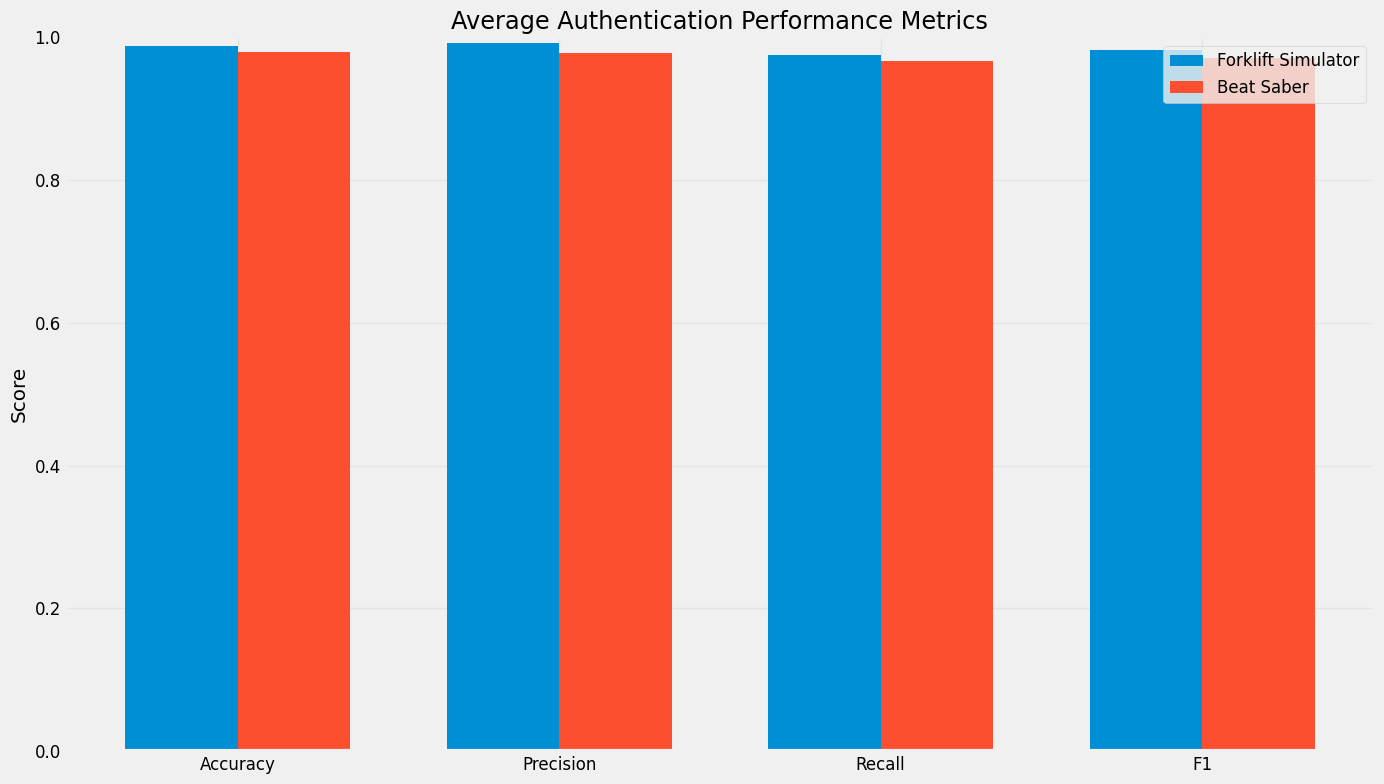

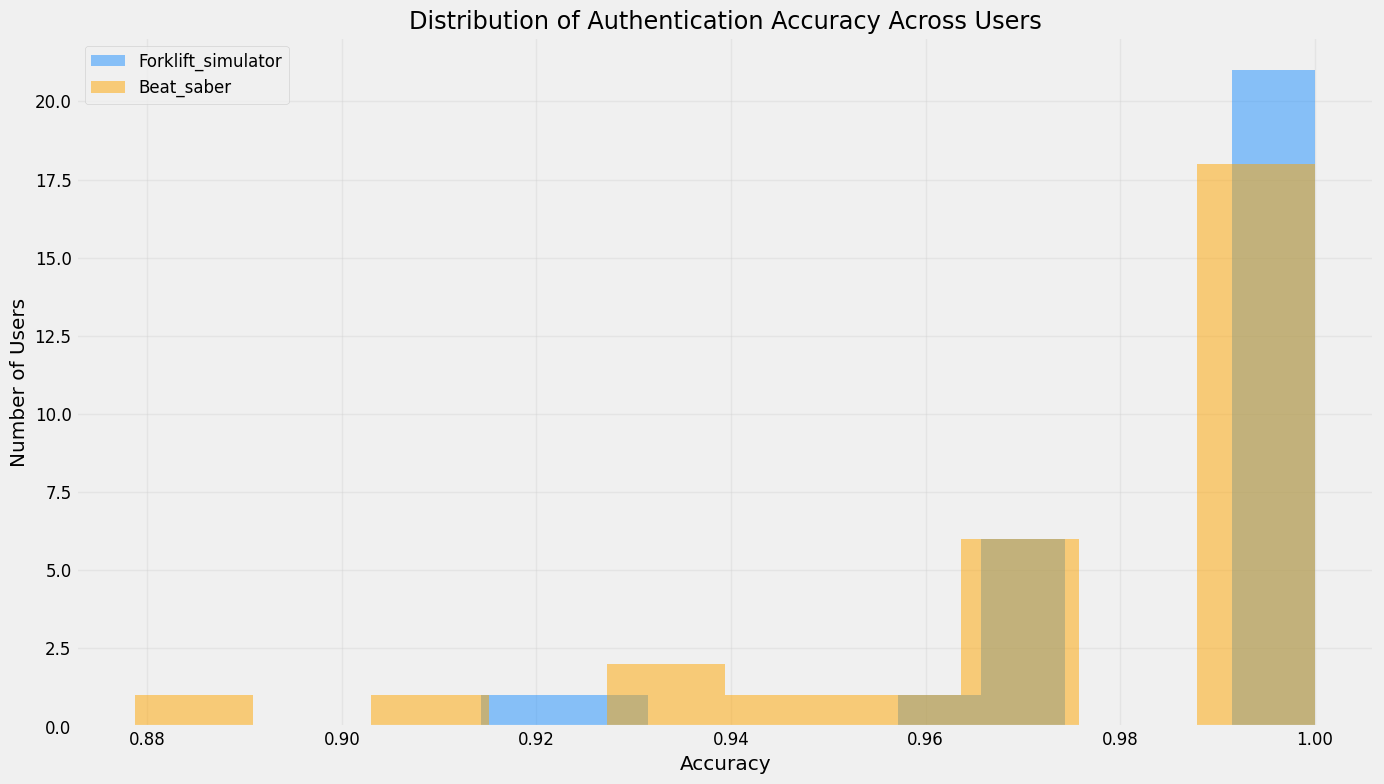

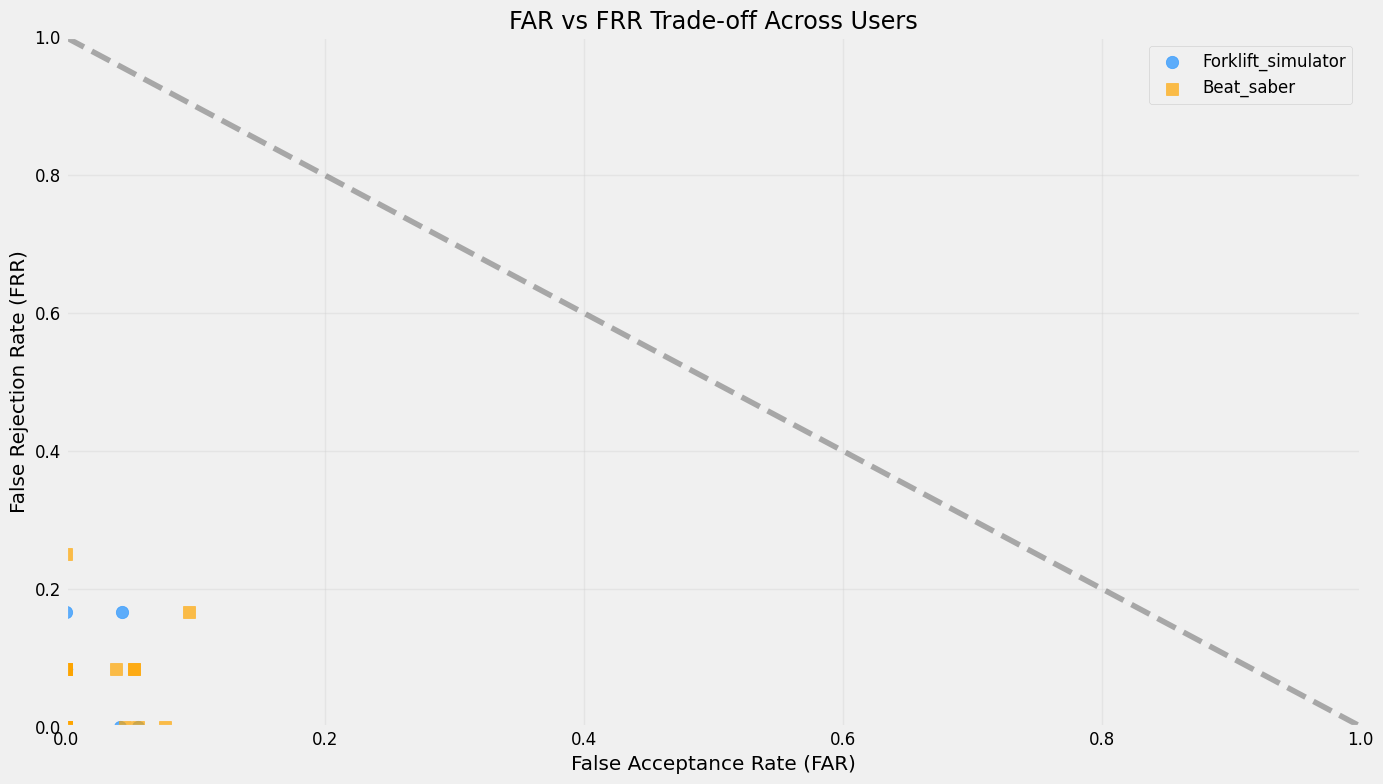

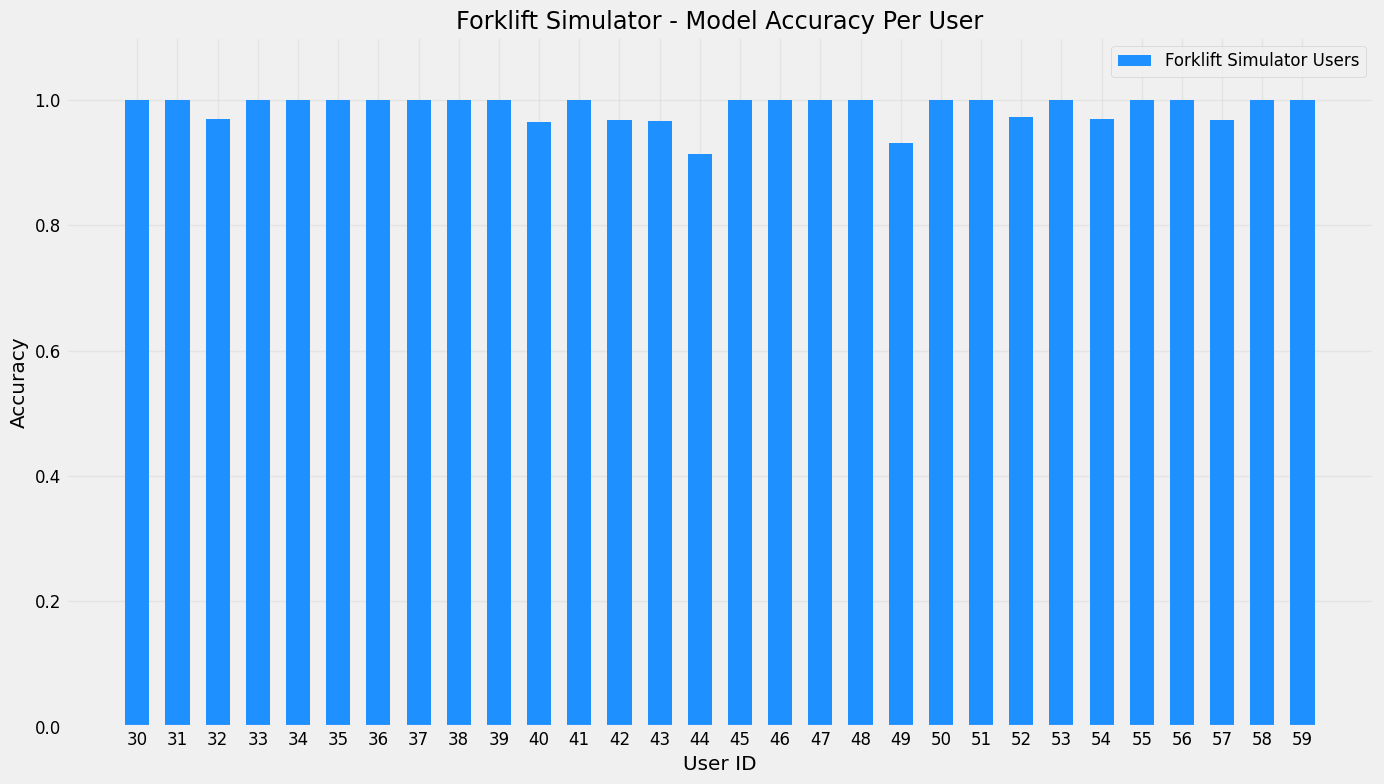

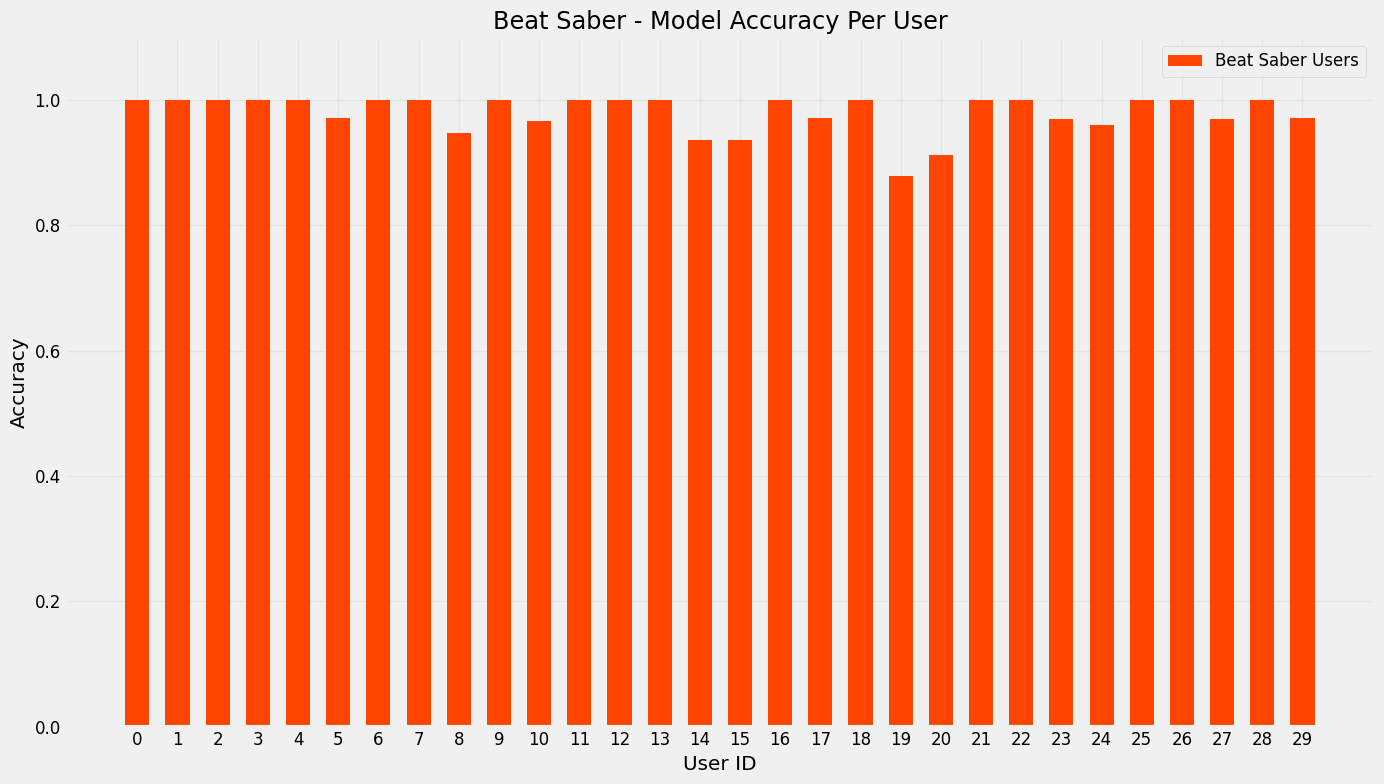

In [11]:
# Sample users for each game
sample_forklift_user = authentication_data['forklift_simulator']['user_ids'][0]
sample_beat_saber_user = authentication_data['beat_saber']['user_ids'][0]

# Visualize performance metrics using RandomForest model
authenticator.visualize_performance(
    sample_user_forklift=sample_forklift_user,
    sample_user_beat_saber=sample_beat_saber_user,
    model_name="RandomForest",
    filename = FILENAME,
)

## 1.6. Evaluate Authentication With Voting

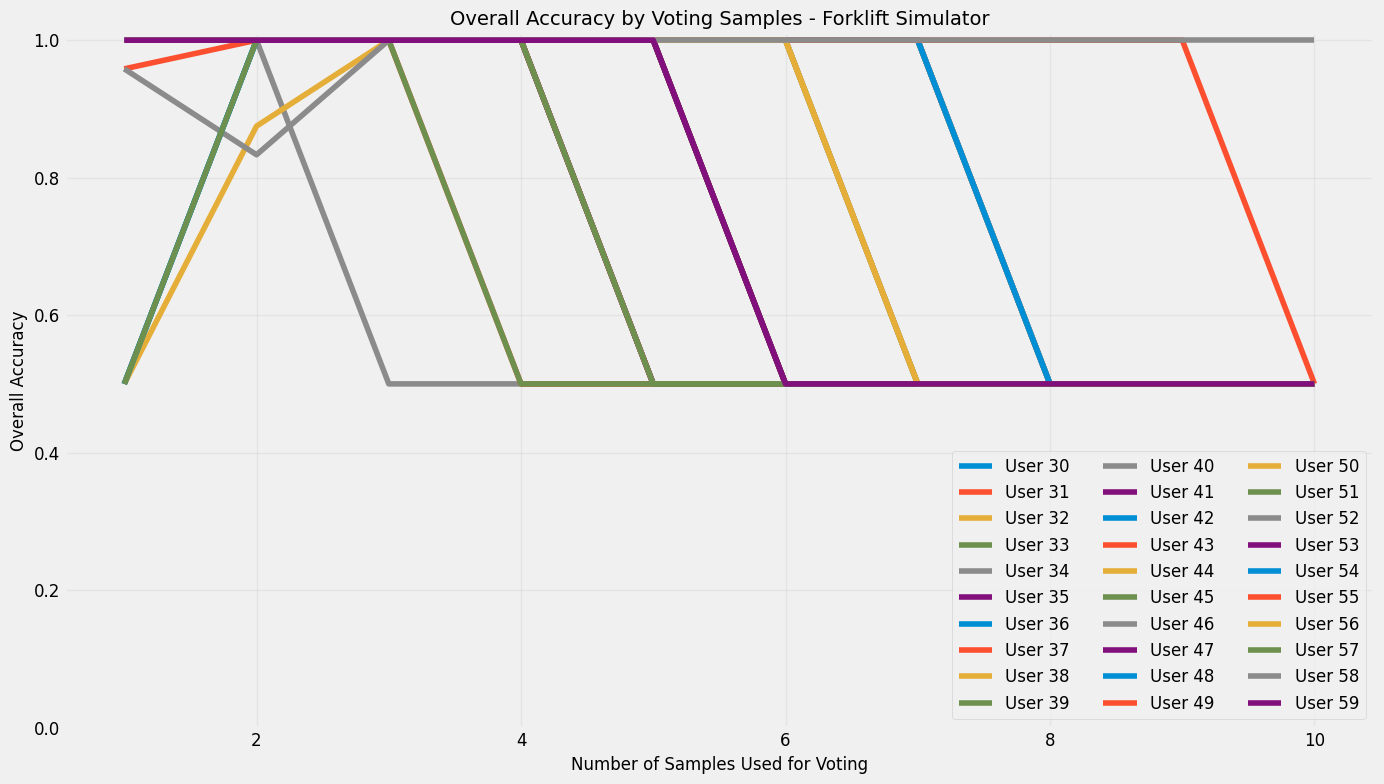

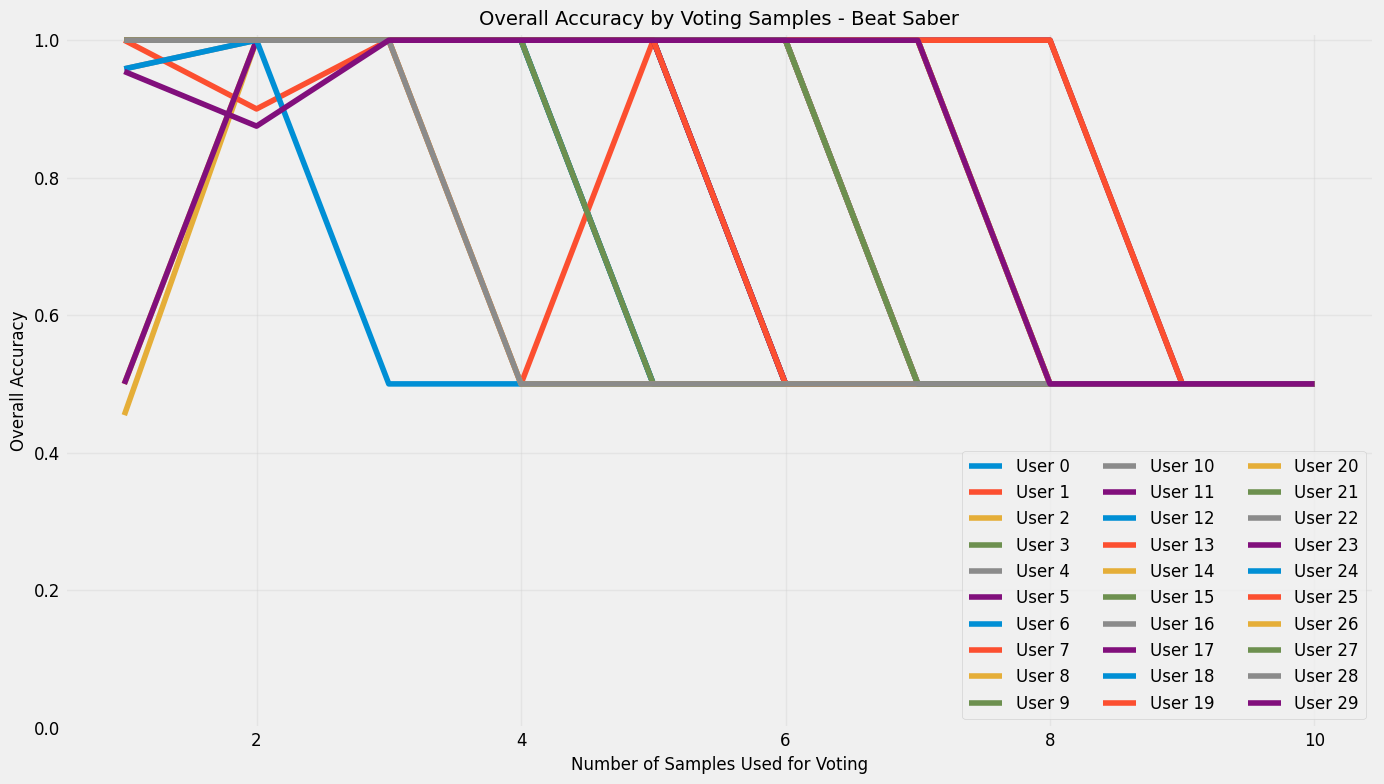

In [12]:
results = authenticator.analyze_voting_sample_effect_by_user(voting_threshold=0.5, model_name="RandomForest", filename=FILENAME)

## 1.7. Feature Importance Analysis

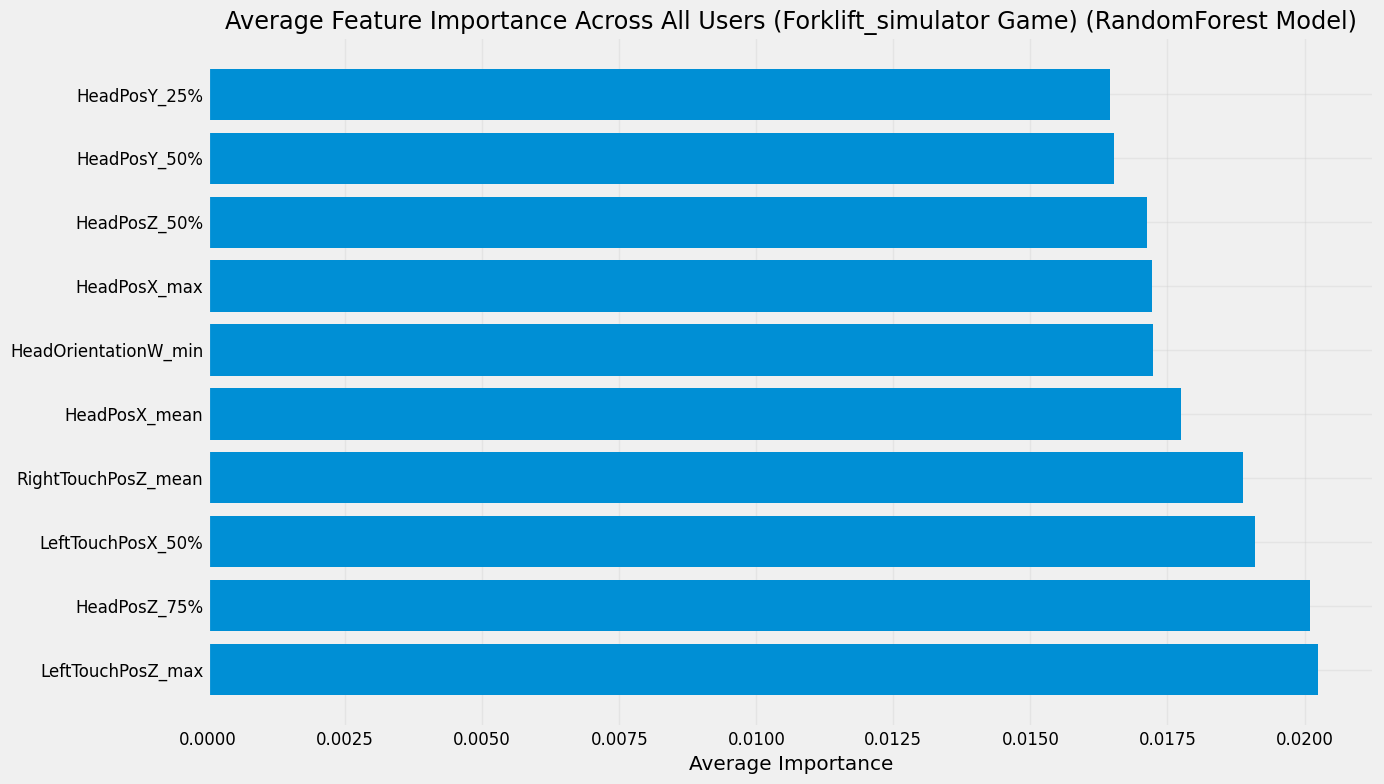

,Feature,Average_Importance
206,LeftTouchPosZ_max,0.020255
107,HeadPosZ_75%,0.020107
190,LeftTouchPosX_50%,0.019099
305,RightTouchPosZ_mean,0.018870
95,HeadPosX_mean,0.017743
...,...,...
31,Accel_LeftTouchPosY_max,0.000053
30,Accel_LeftTouchPosY_75%,0.000038
242,LeftTouch_OrientationVelocityY_mean,0.000031
39,Accel_LeftTouchPosZ_mean,0.000030


In [13]:
authenticator.visualize_feature_importance(
    user_id=None, 
    game_type='forklift_simulator', 
    model_name='RandomForest',
    filename = FILENAME
)

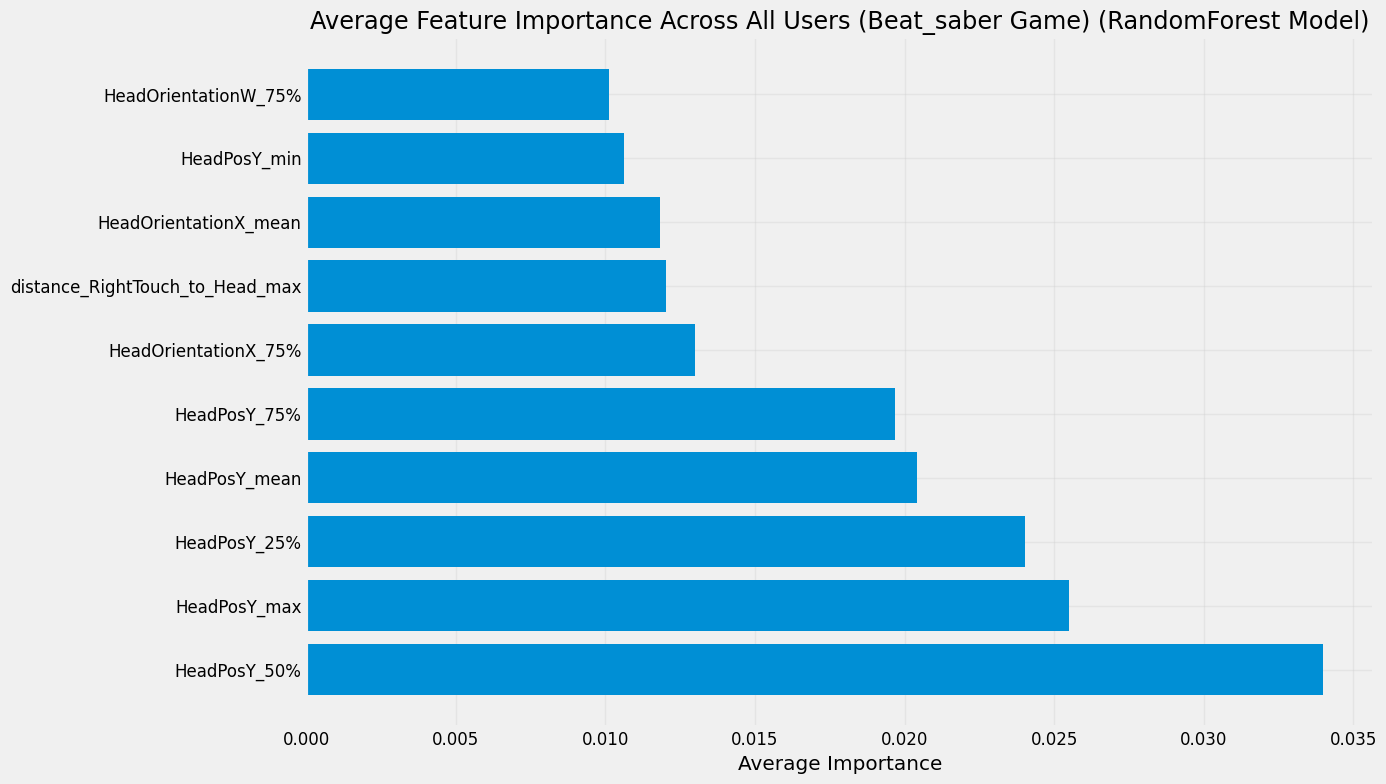

,Feature,Average_Importance
99,HeadPosY_50%,0.033992
101,HeadPosY_max,0.025486
98,HeadPosY_25%,0.024020
102,HeadPosY_mean,0.020407
100,HeadPosY_75%,0.019668
...,...,...
39,Accel_LeftTouchPosZ_mean,0.000117
46,Accel_RightTouchPosX_mean,0.000092
4,Accel_HeadPosX_mean,0.000087
26,Accel_LeftTouchPosX_min,0.000083


In [14]:
authenticator.visualize_feature_importance(
    user_id=None, 
    game_type='beat_saber',  
    model_name='RandomForest',
    filename = FILENAME
)

## 1.8. Authentication Threshold Analysis

Analyze the effect of different confidence thresholds on authentication performance.

In [15]:
forklift_threshold_results = authenticator.threshold_analysis(
    user_id=None, 
    game_type='forklift_simulator', 
    model_name='RandomForest',
    filename = FILENAME,
)


FORKLIFT SIMULATOR THRESHOLD ANALYSIS


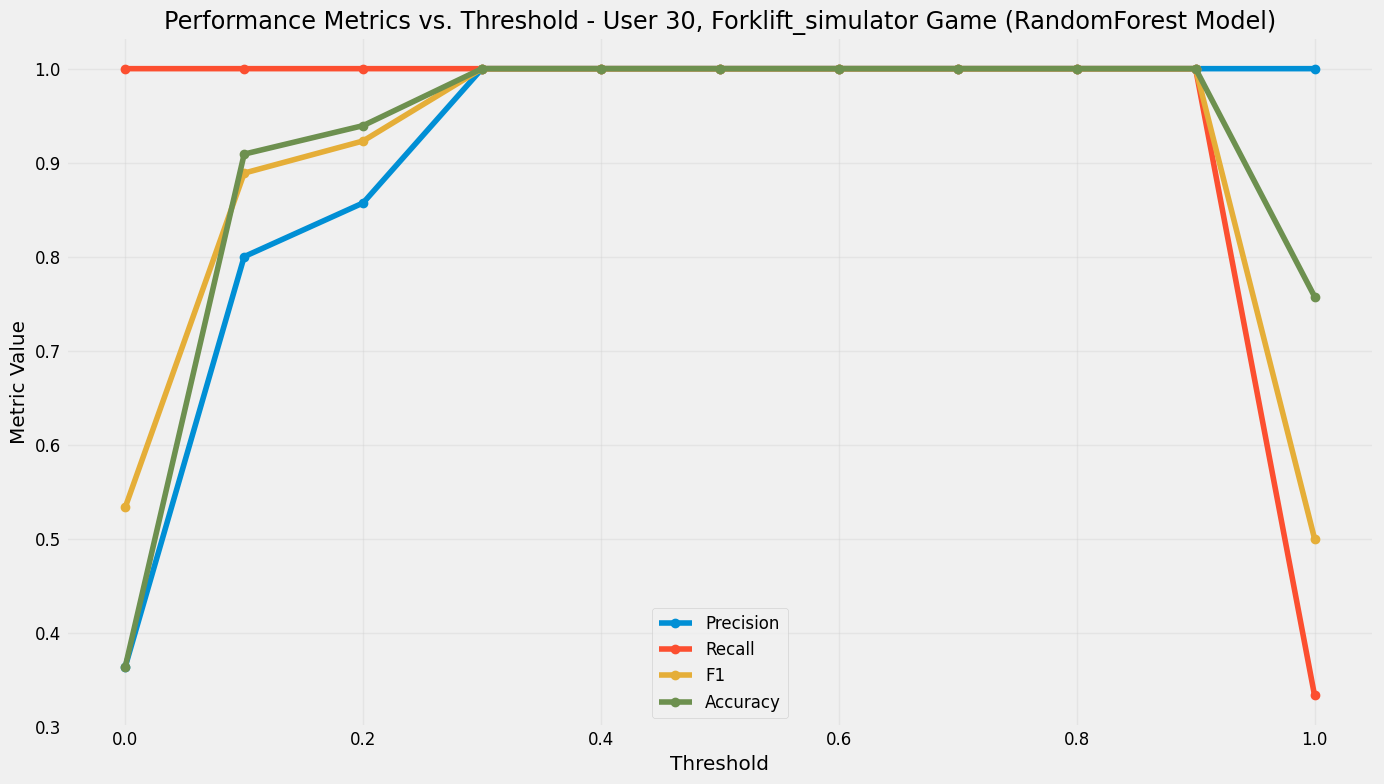

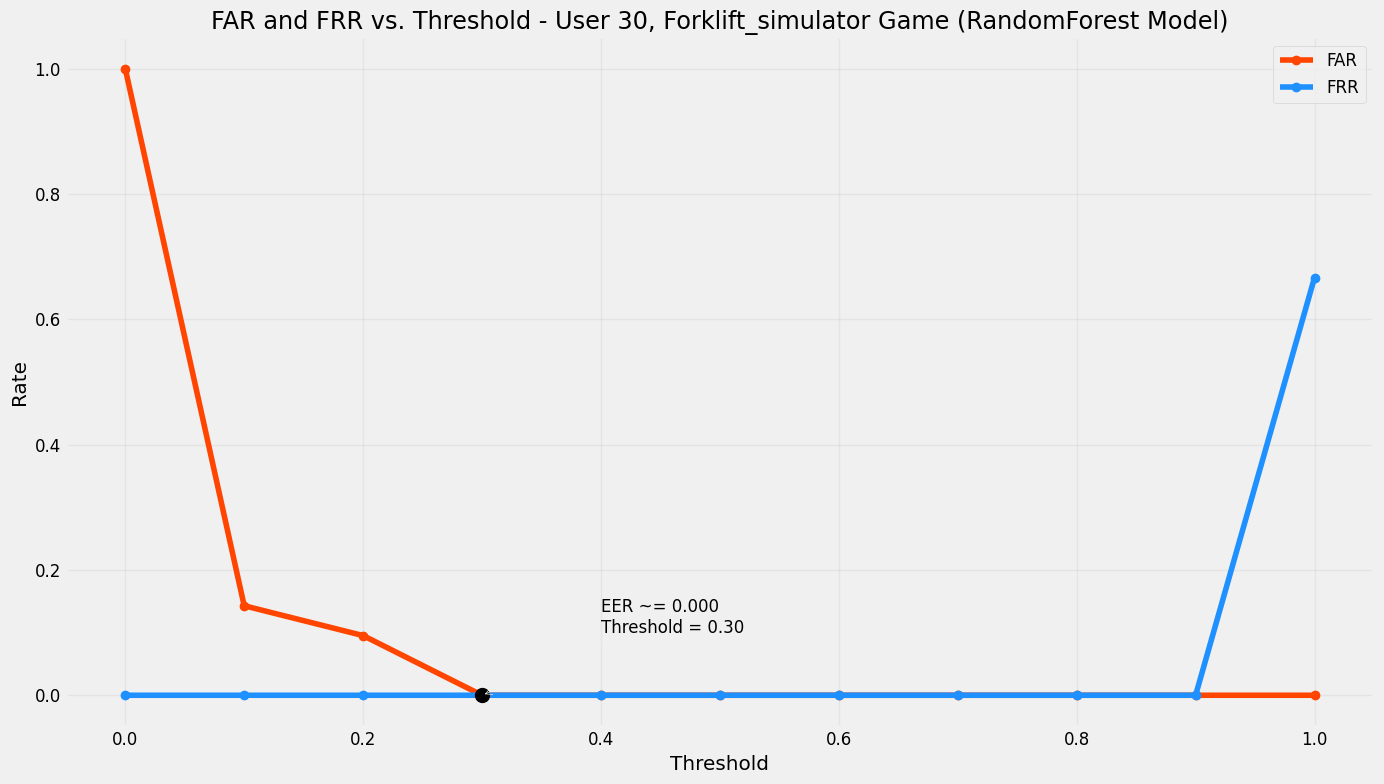

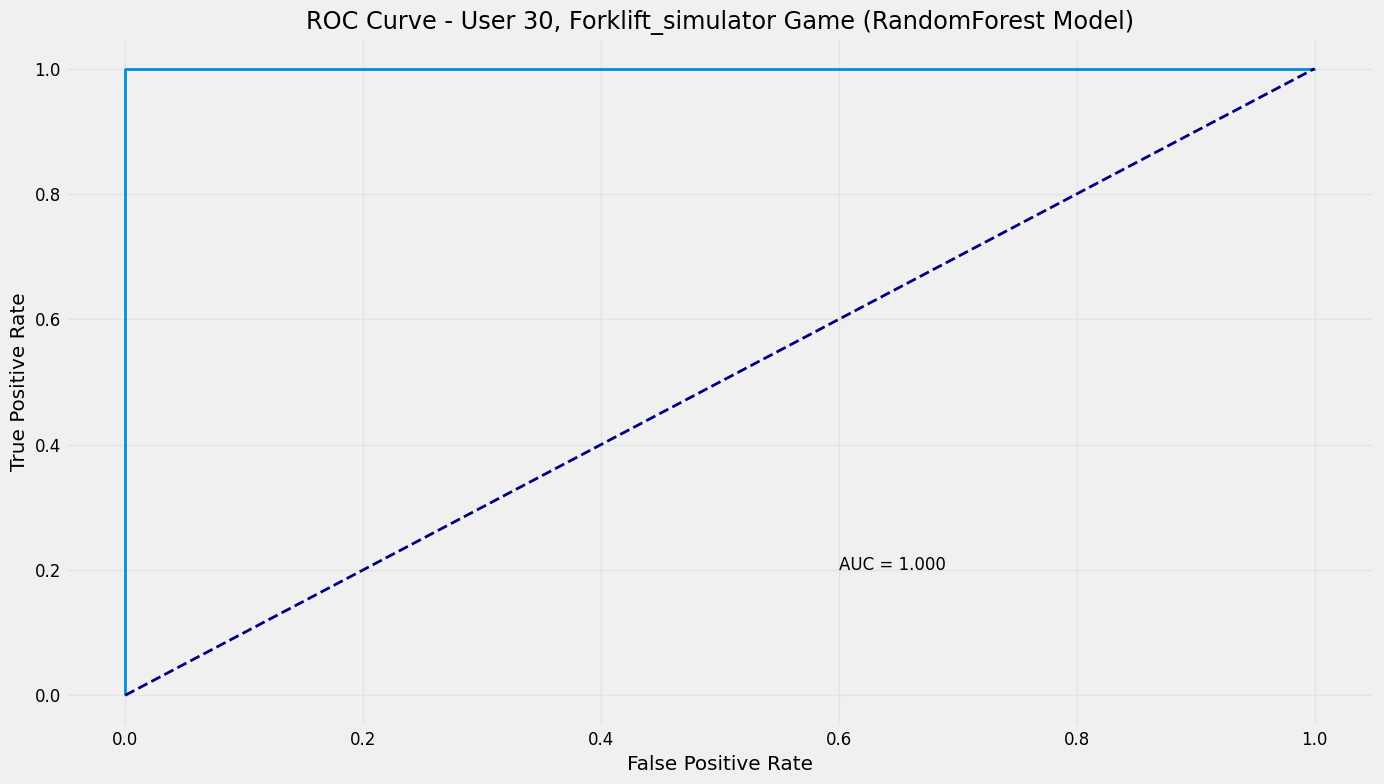

In [16]:
# Analyze authentication thresholds for sample users from each game
sample_forklift_user = authentication_data['forklift_simulator']['user_ids'][0]
print("\nFORKLIFT SIMULATOR THRESHOLD ANALYSIS")
print("====================================")
forklift_threshold_results = authenticator.threshold_analysis(
    user_id=sample_forklift_user, 
    game_type='forklift_simulator', 
    model_name='RandomForest',
    filename = FILENAME,
)


BEAT SABER THRESHOLD ANALYSIS


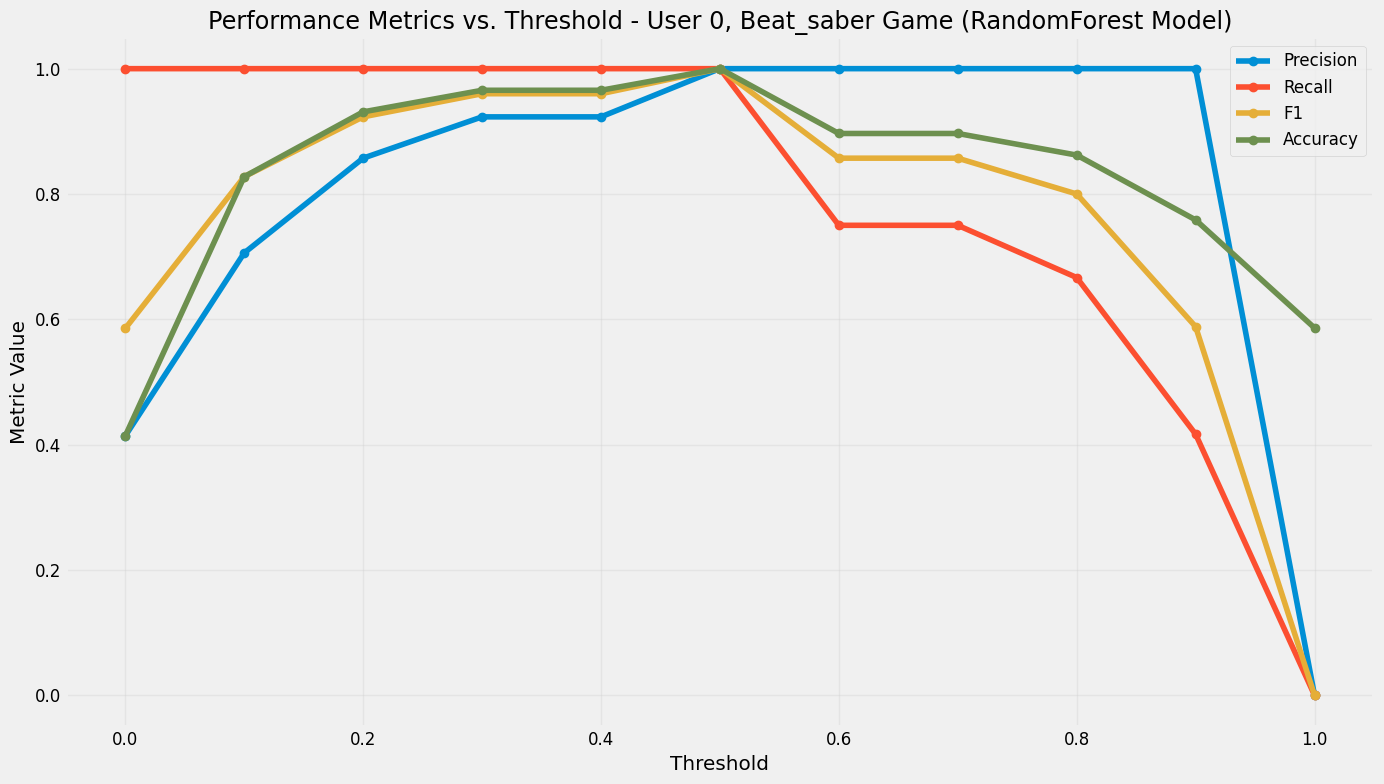

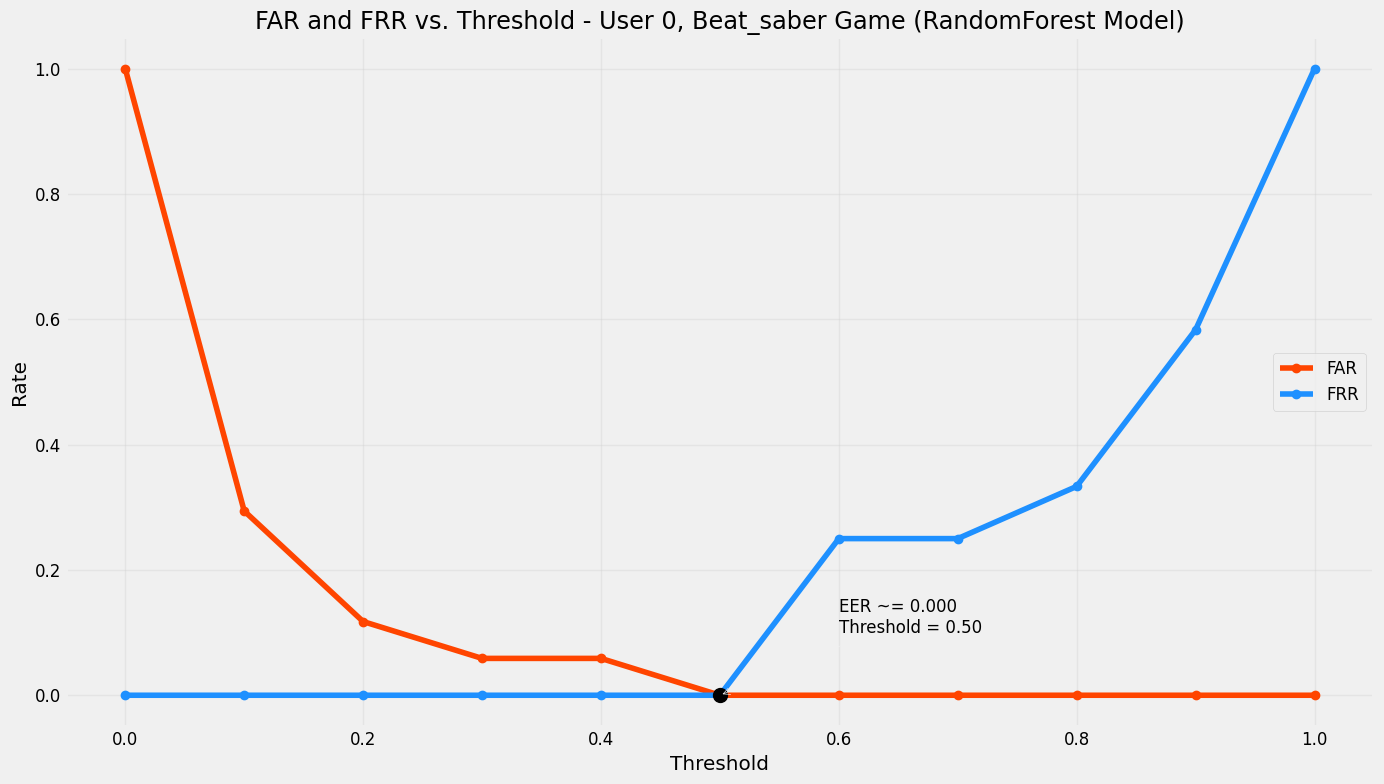

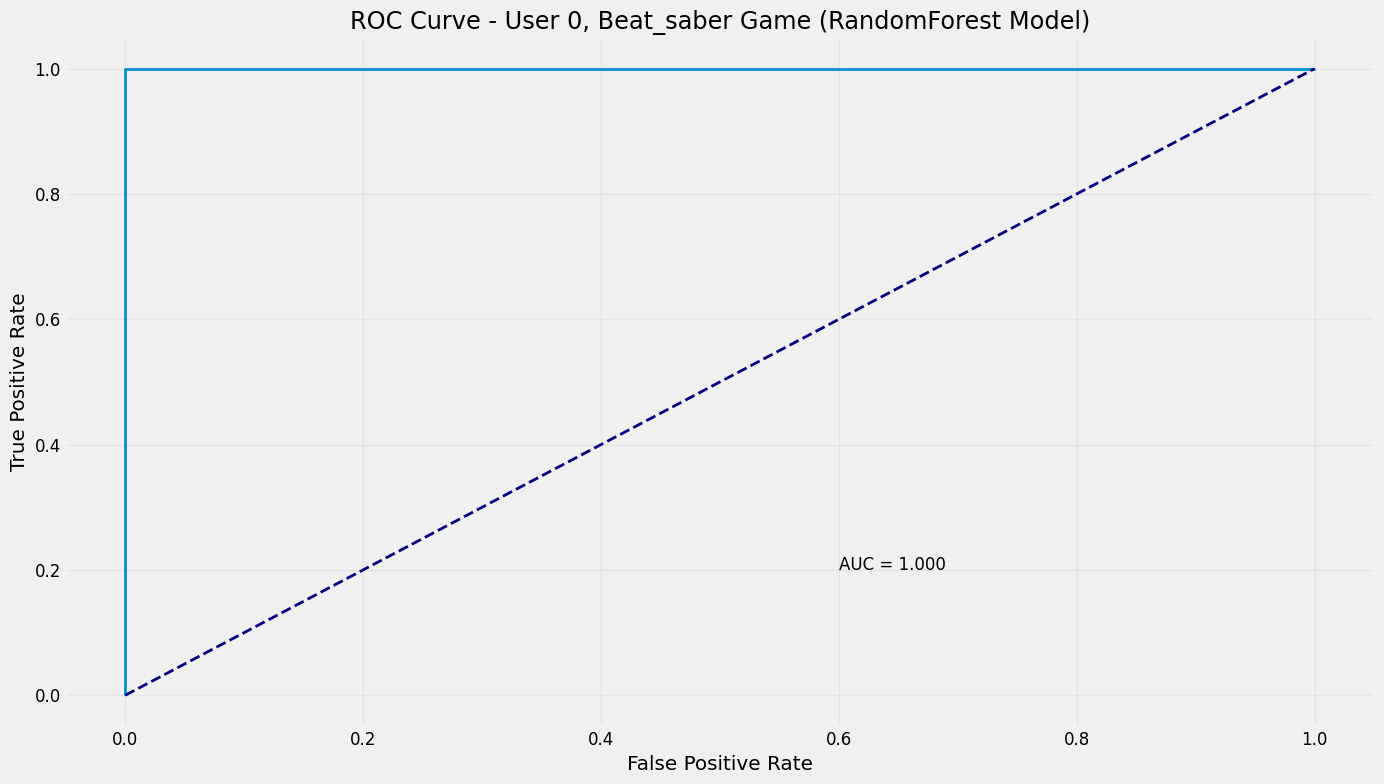

In [17]:
sample_beat_saber_user = authentication_data['beat_saber']['user_ids'][0]
print("\nBEAT SABER THRESHOLD ANALYSIS")
print("============================")
beat_saber_threshold_results = authenticator.threshold_analysis(
    user_id=sample_beat_saber_user, 
    game_type='beat_saber', 
    model_name='RandomForest',
    filename = FILENAME
)

## 1.9. Intruder Simulation and Detection

Test how well the system detects different types of intruders trying to impersonate legitimate users.

In [18]:
intruder_data_path = '../../data/processed/intruders'
output_dir = '../../results/user_authentification/intruders_evaluation'
os.makedirs(output_dir, exist_ok=True)

In [19]:
# Sample users from each game
forklift_sample_users = authentication_data['forklift_simulator']['user_ids']
beat_saber_sample_users = authentication_data['beat_saber']['user_ids']


Evaluating Forklift Simulator authentication with voting...


combined intruders: 100%|██████████| 99/99 [00:48<00:00,  2.04it/s]


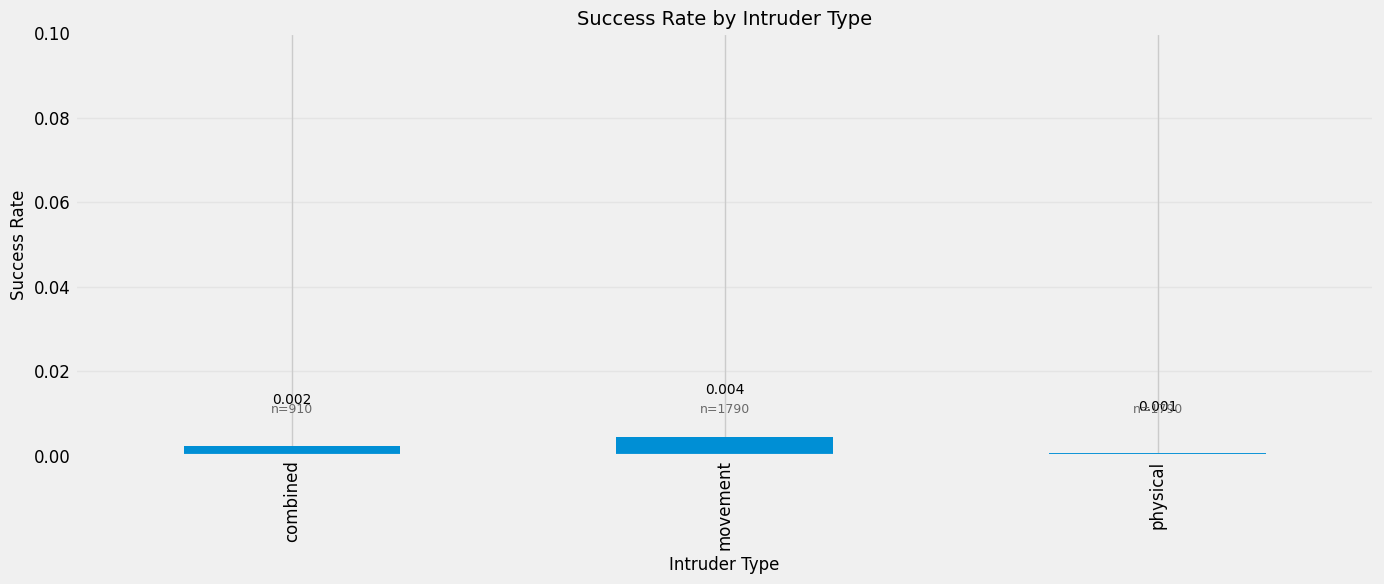

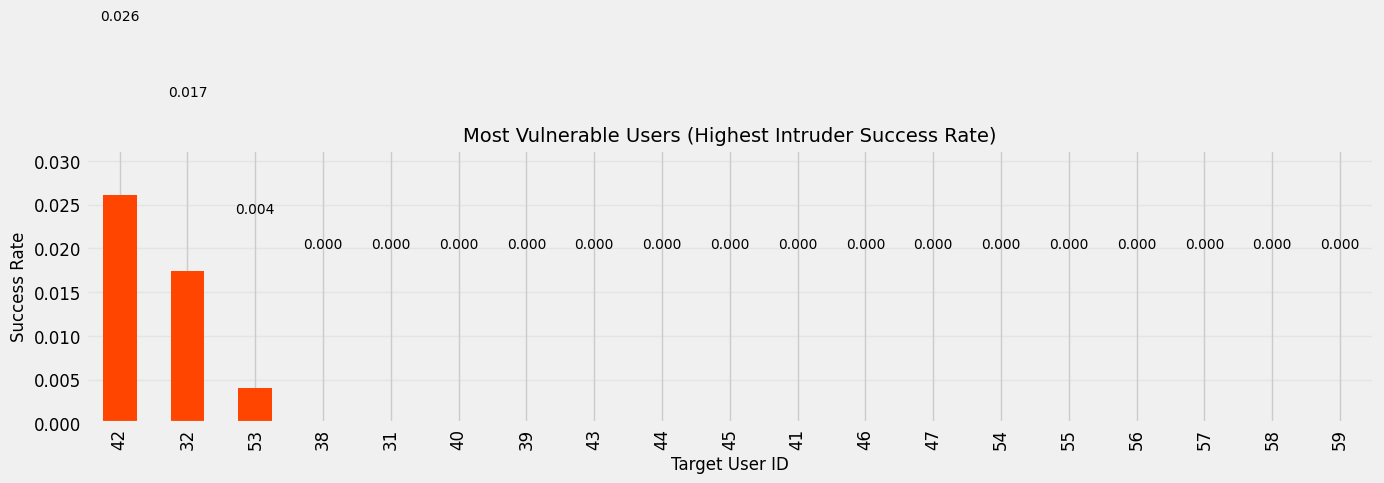

combined intruders: 100%|██████████| 99/99 [00:02<00:00, 35.29it/s]


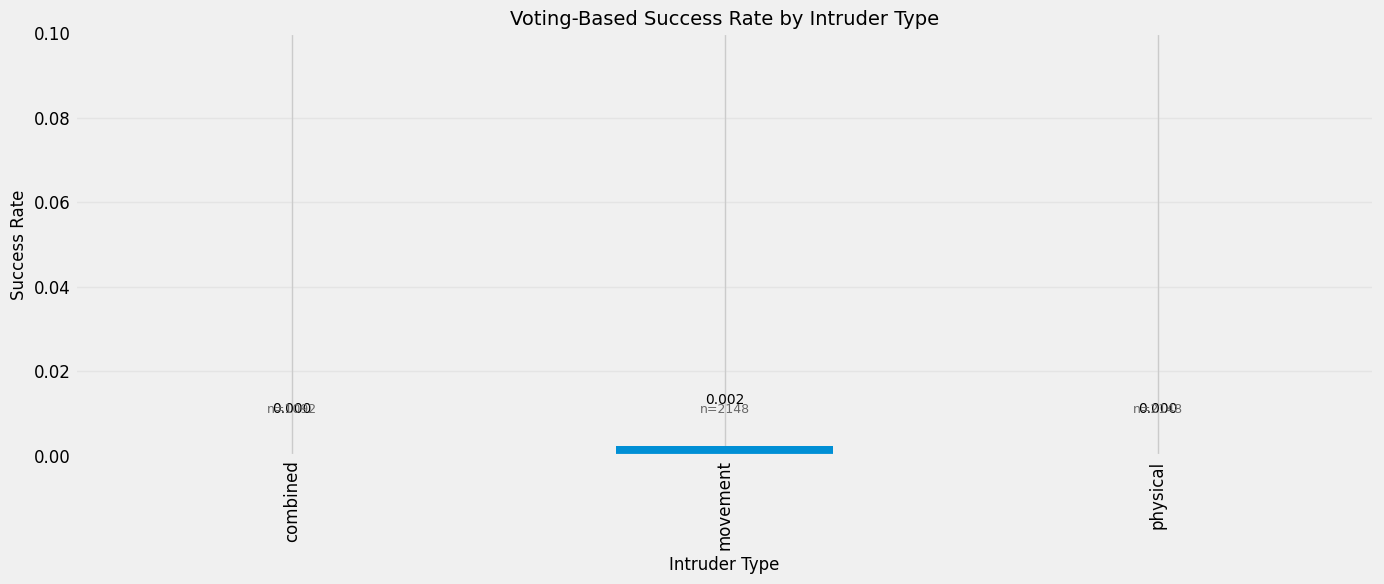

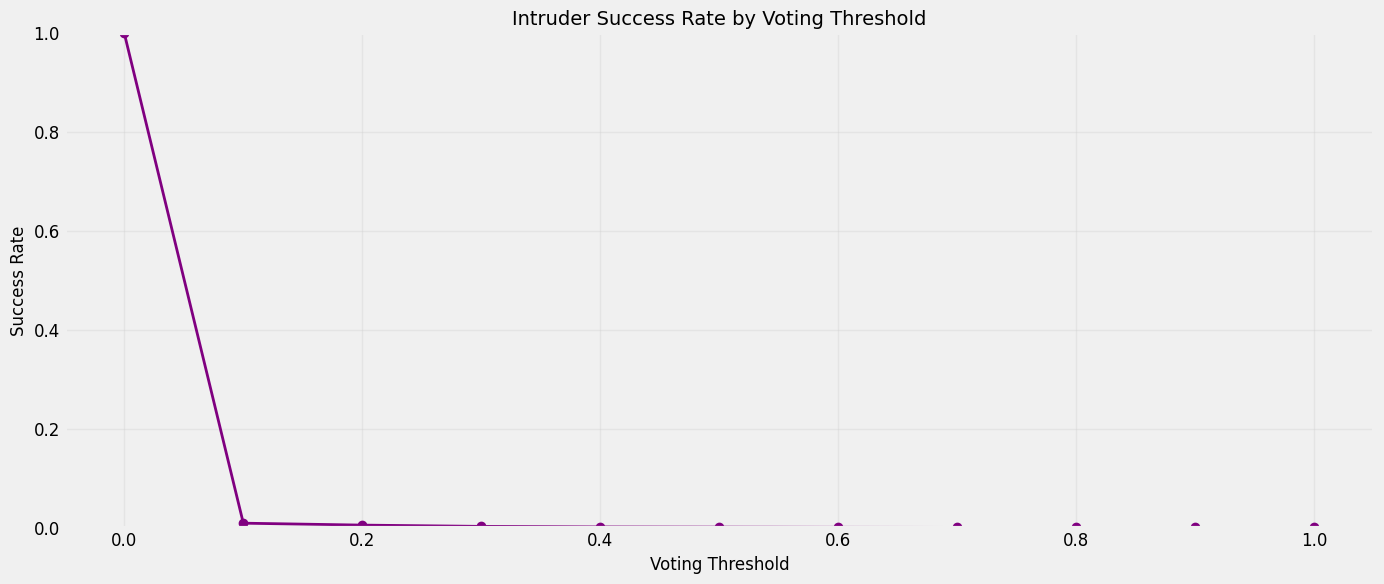

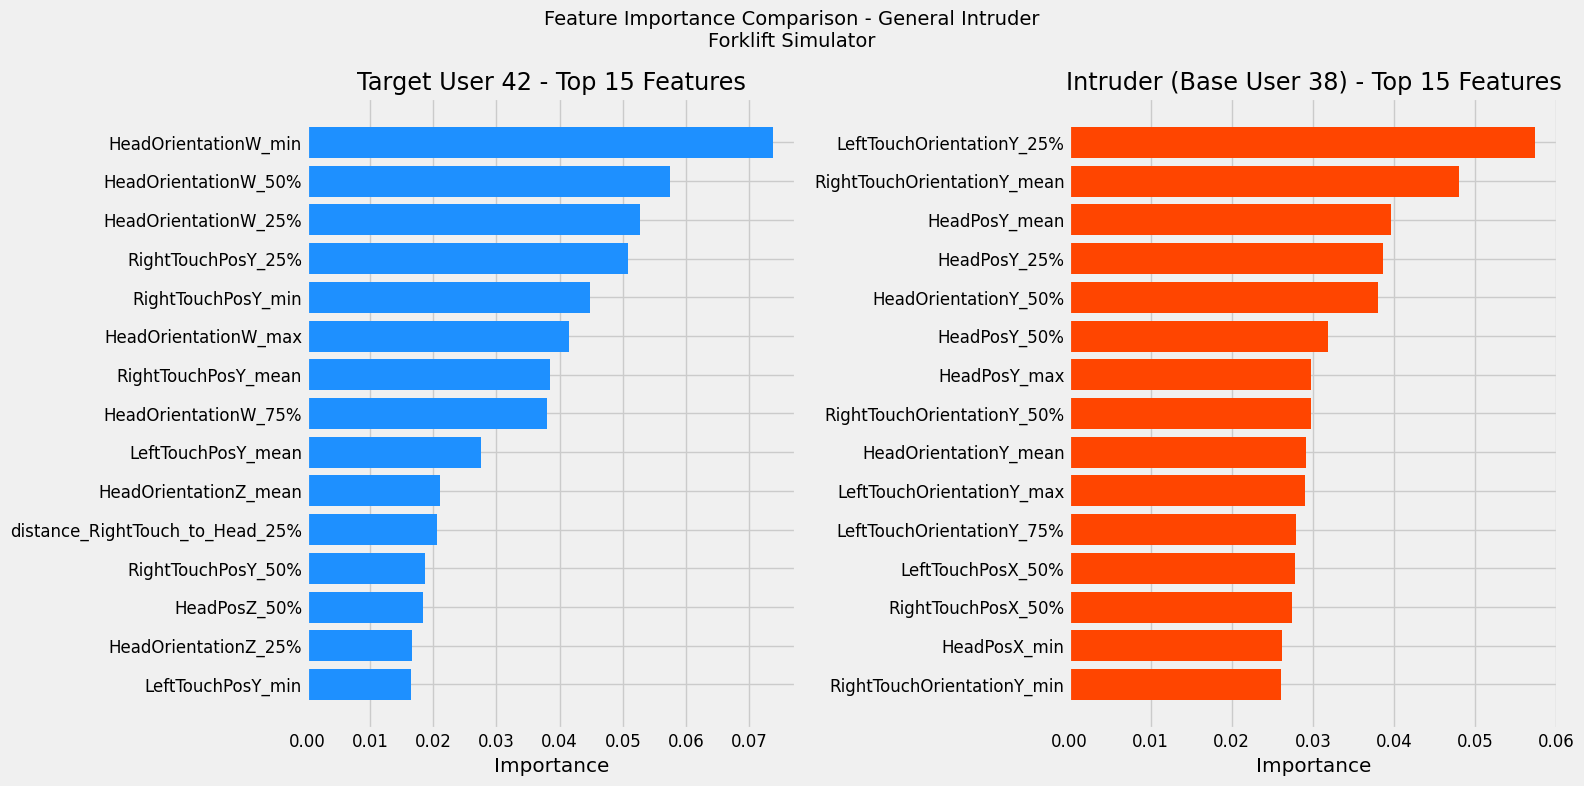

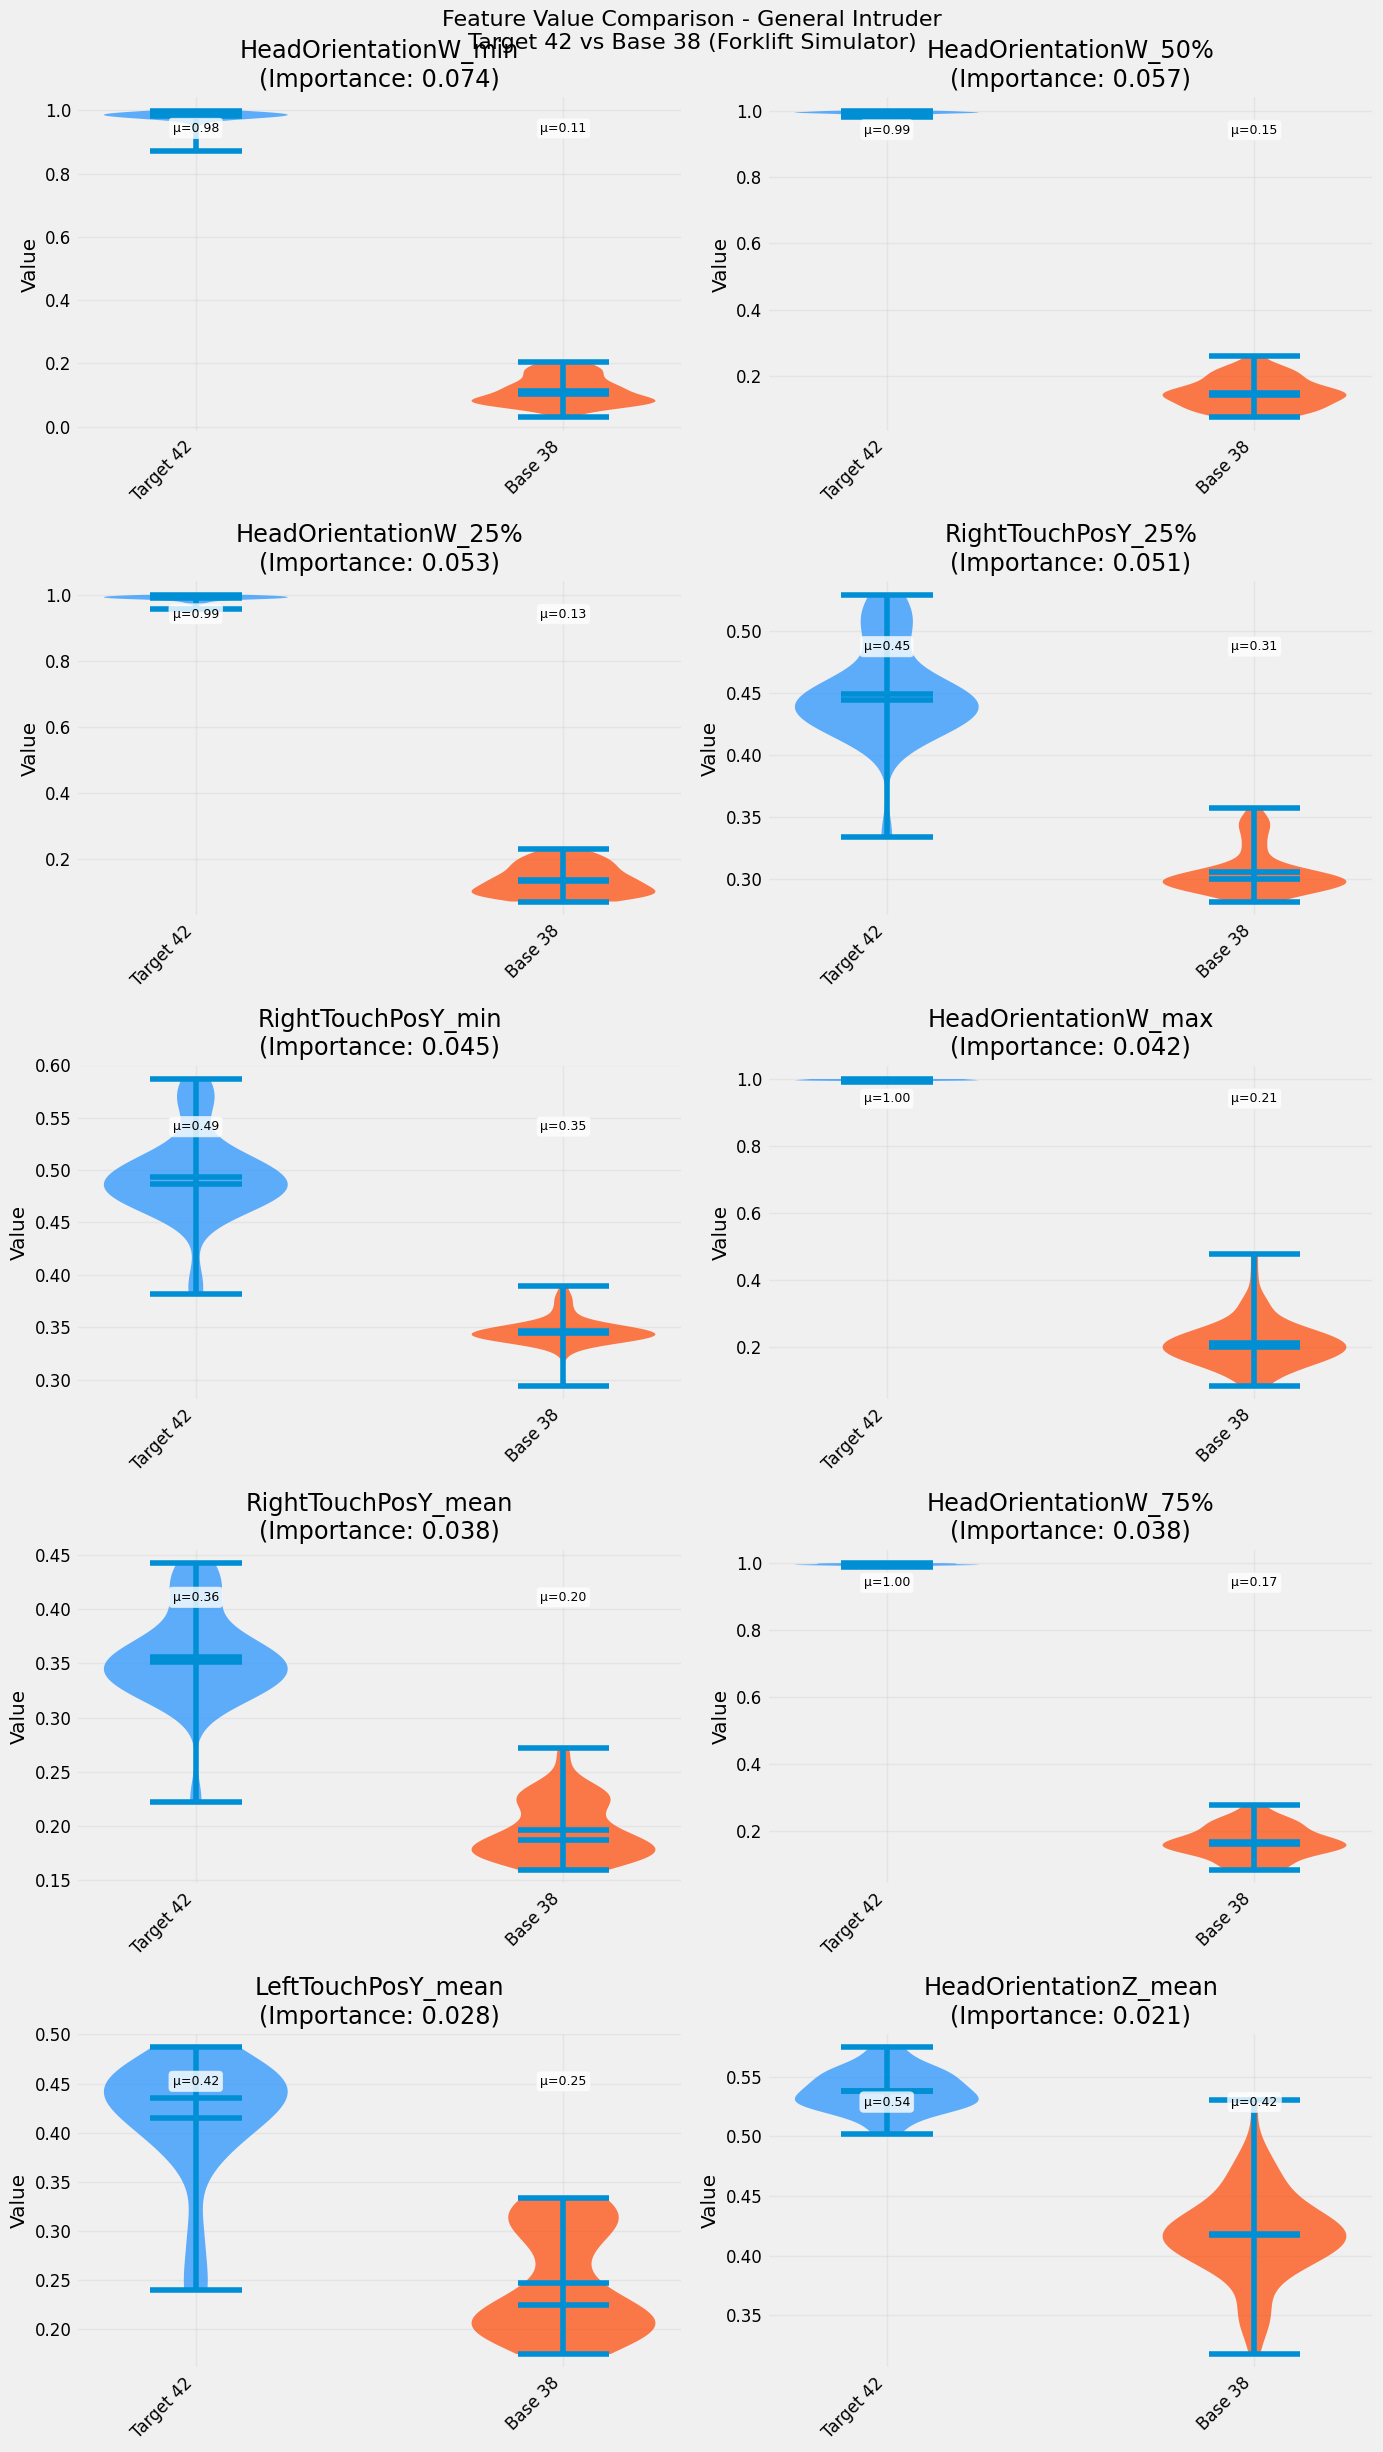

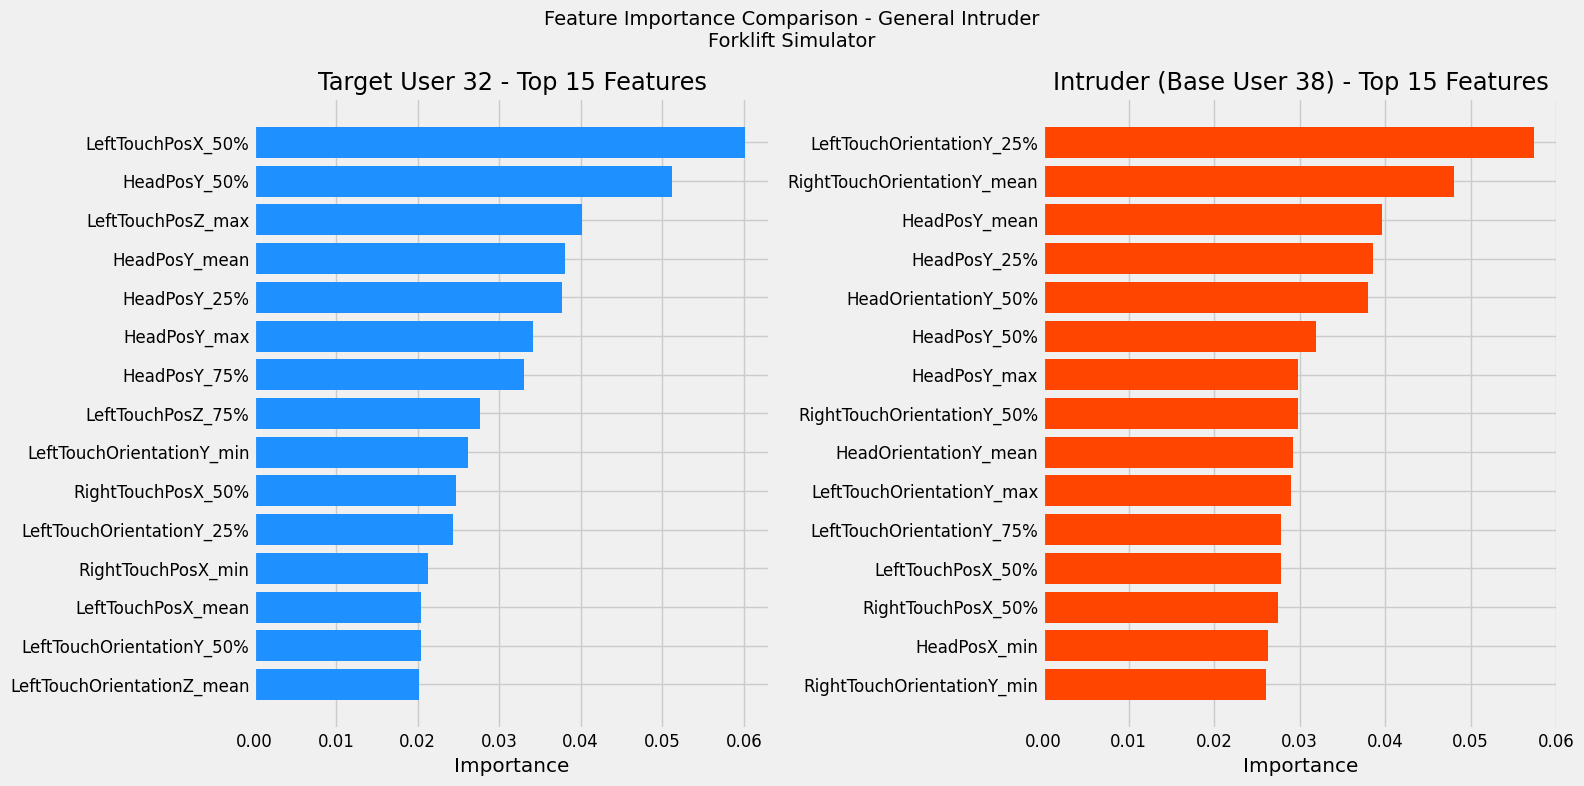

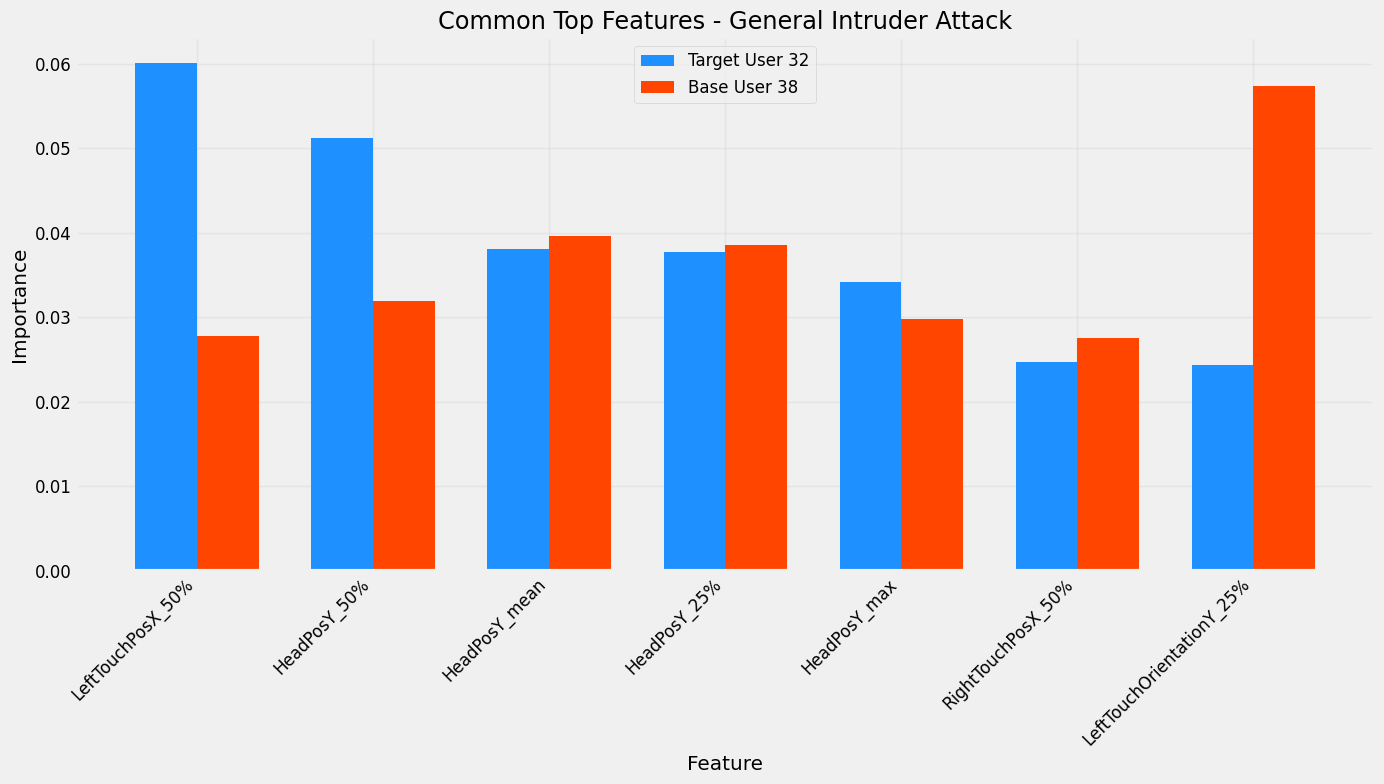

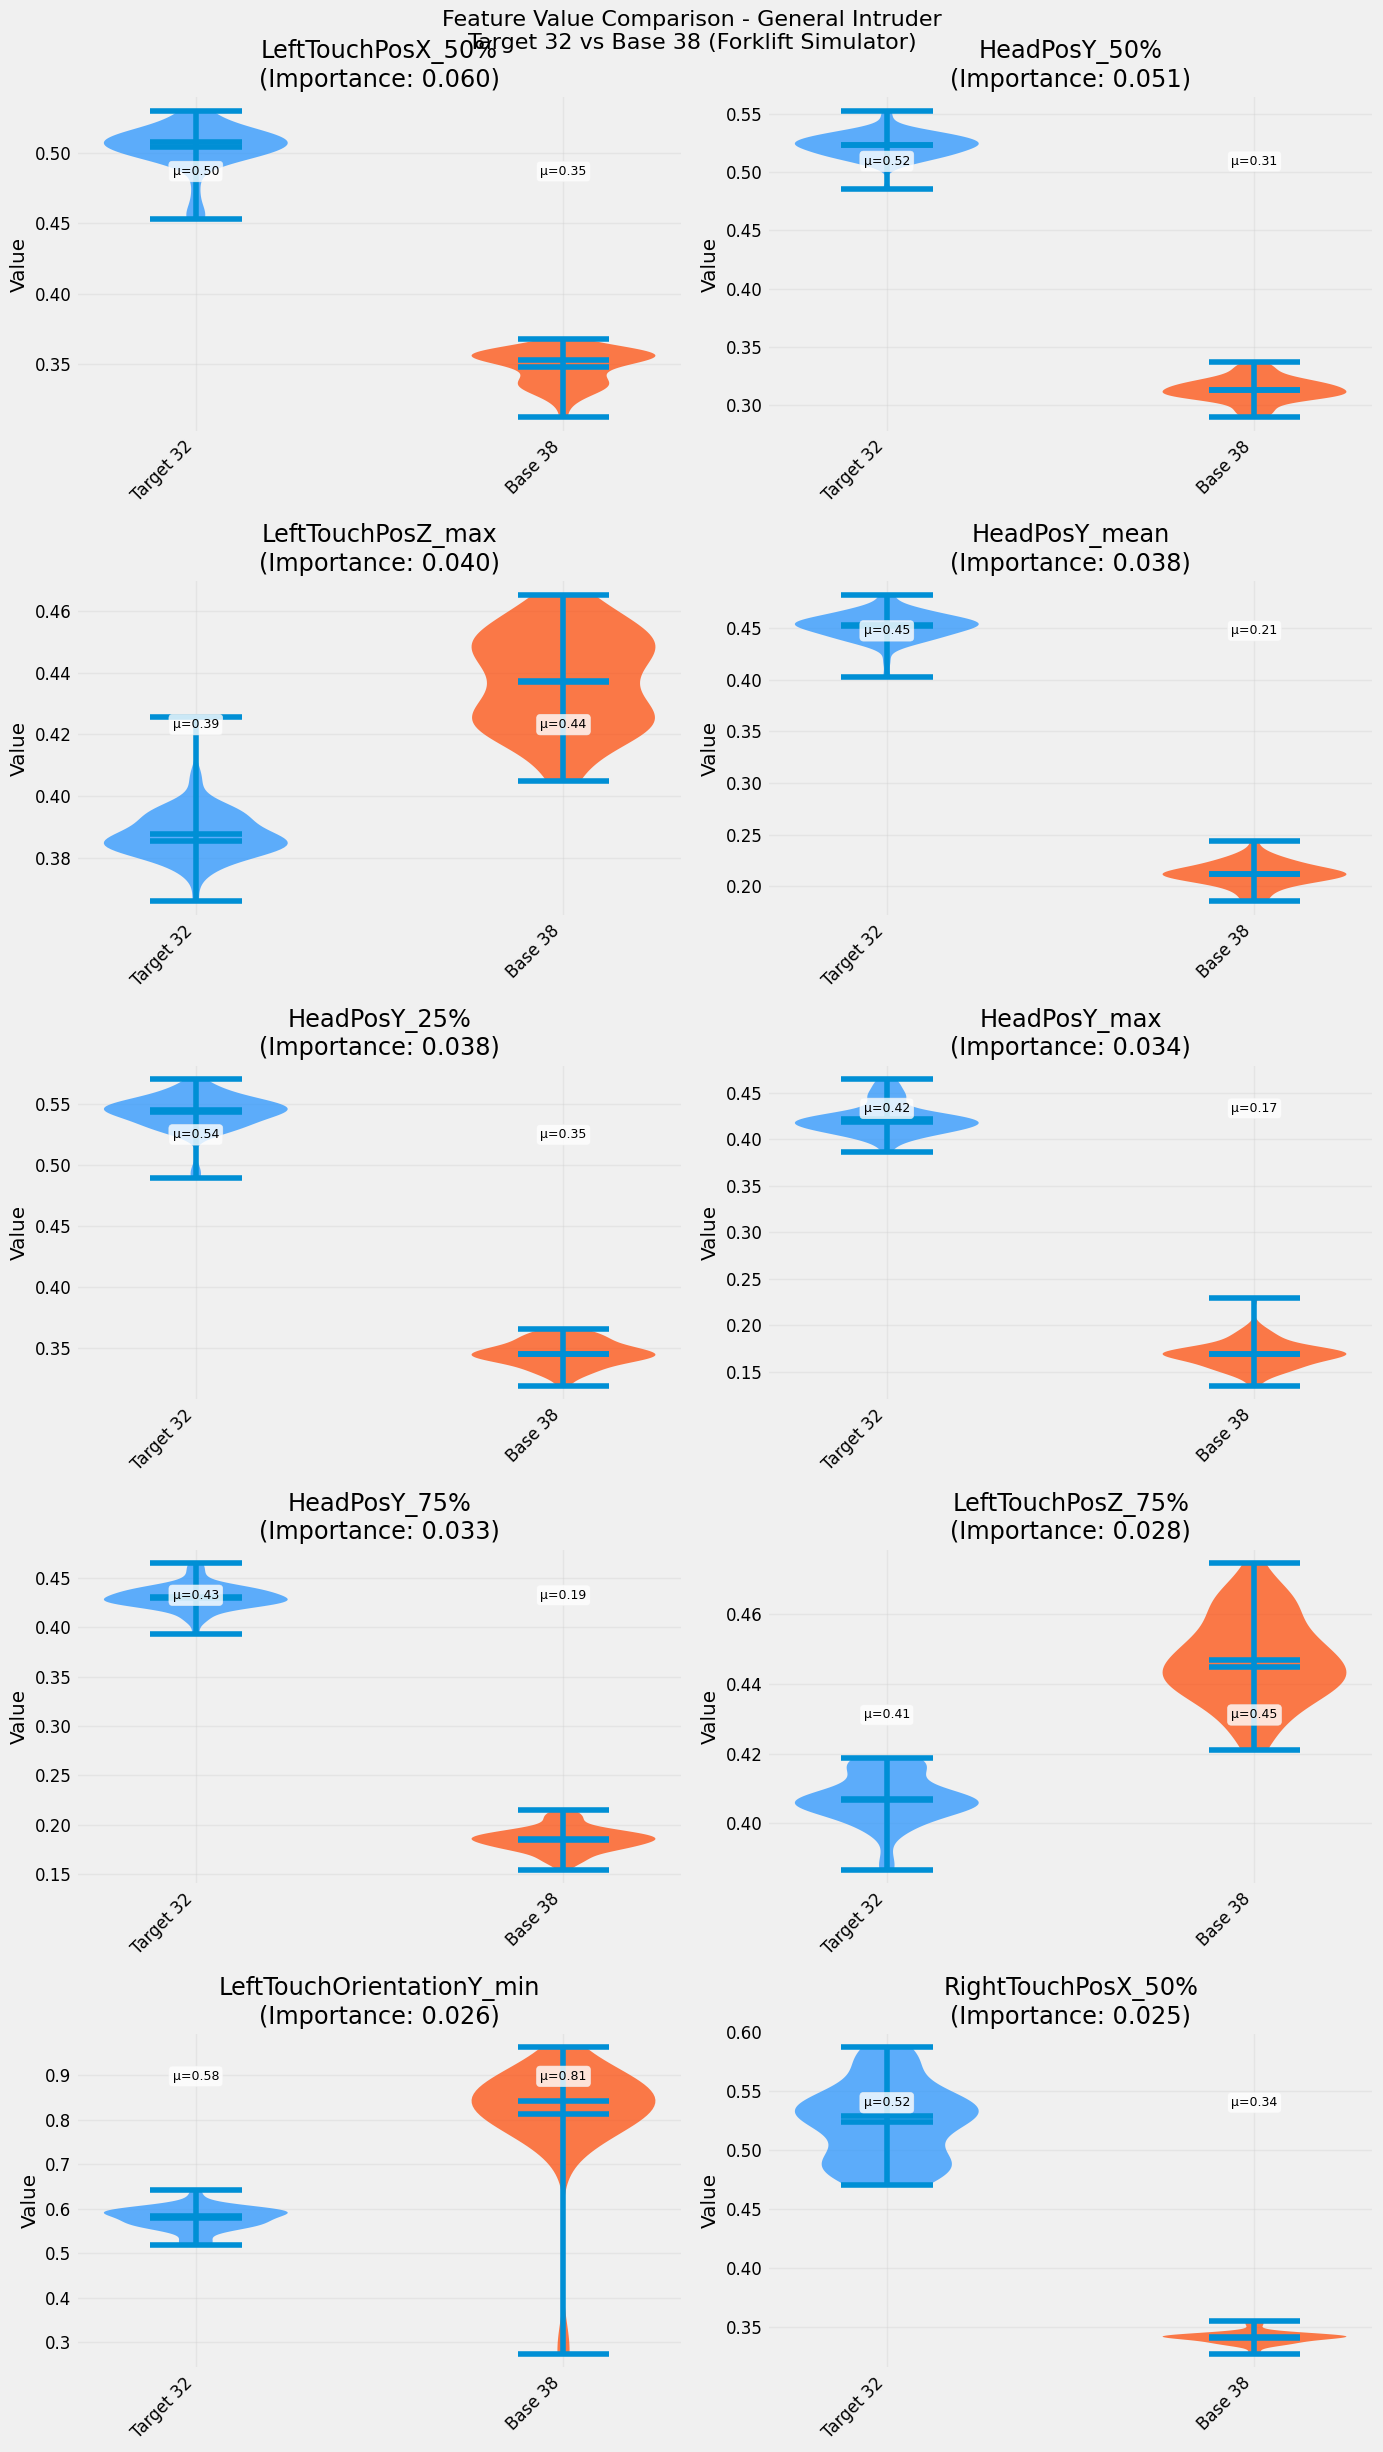

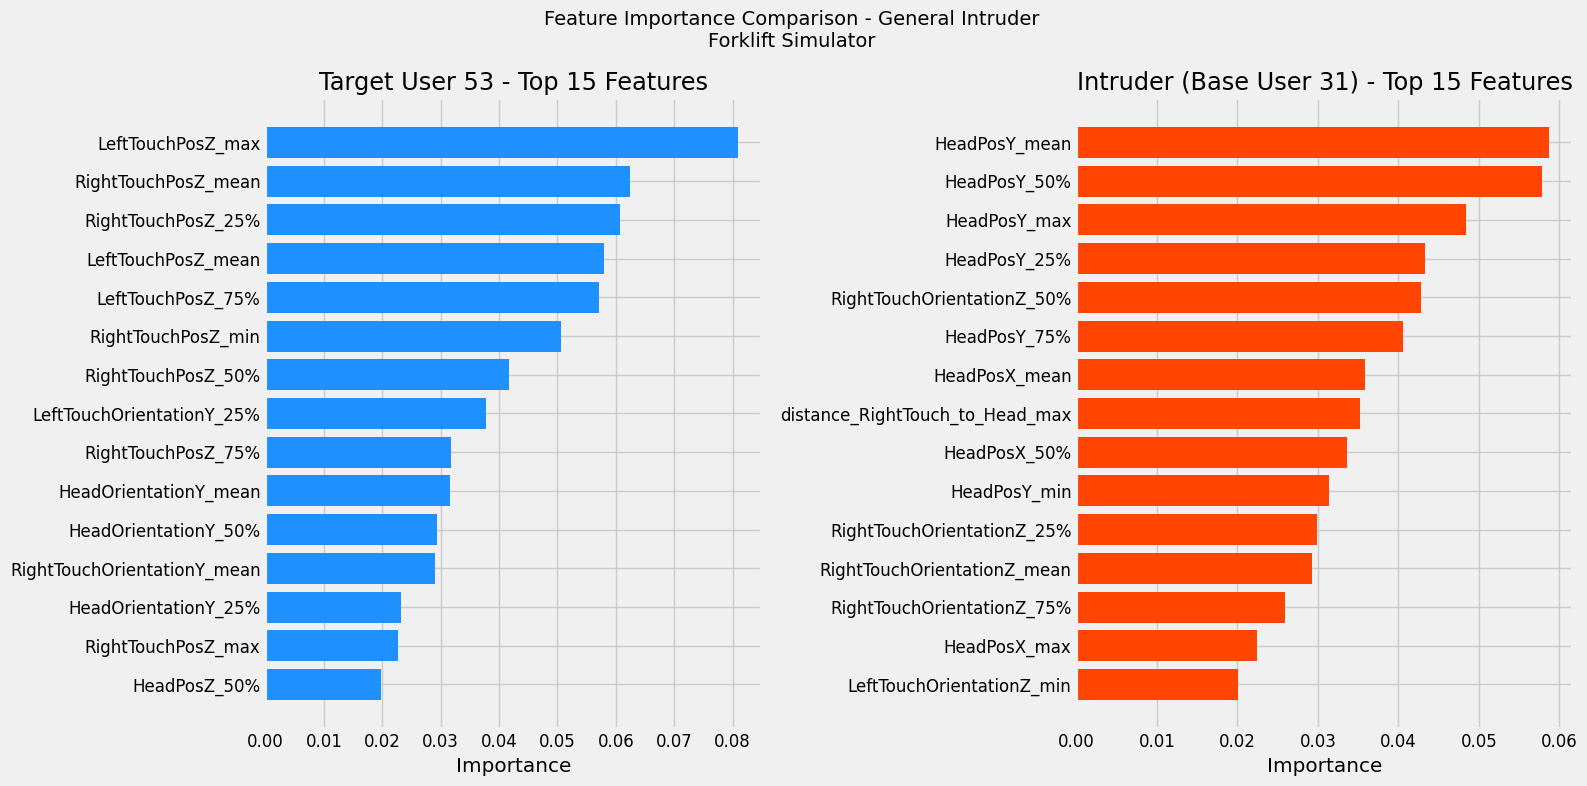

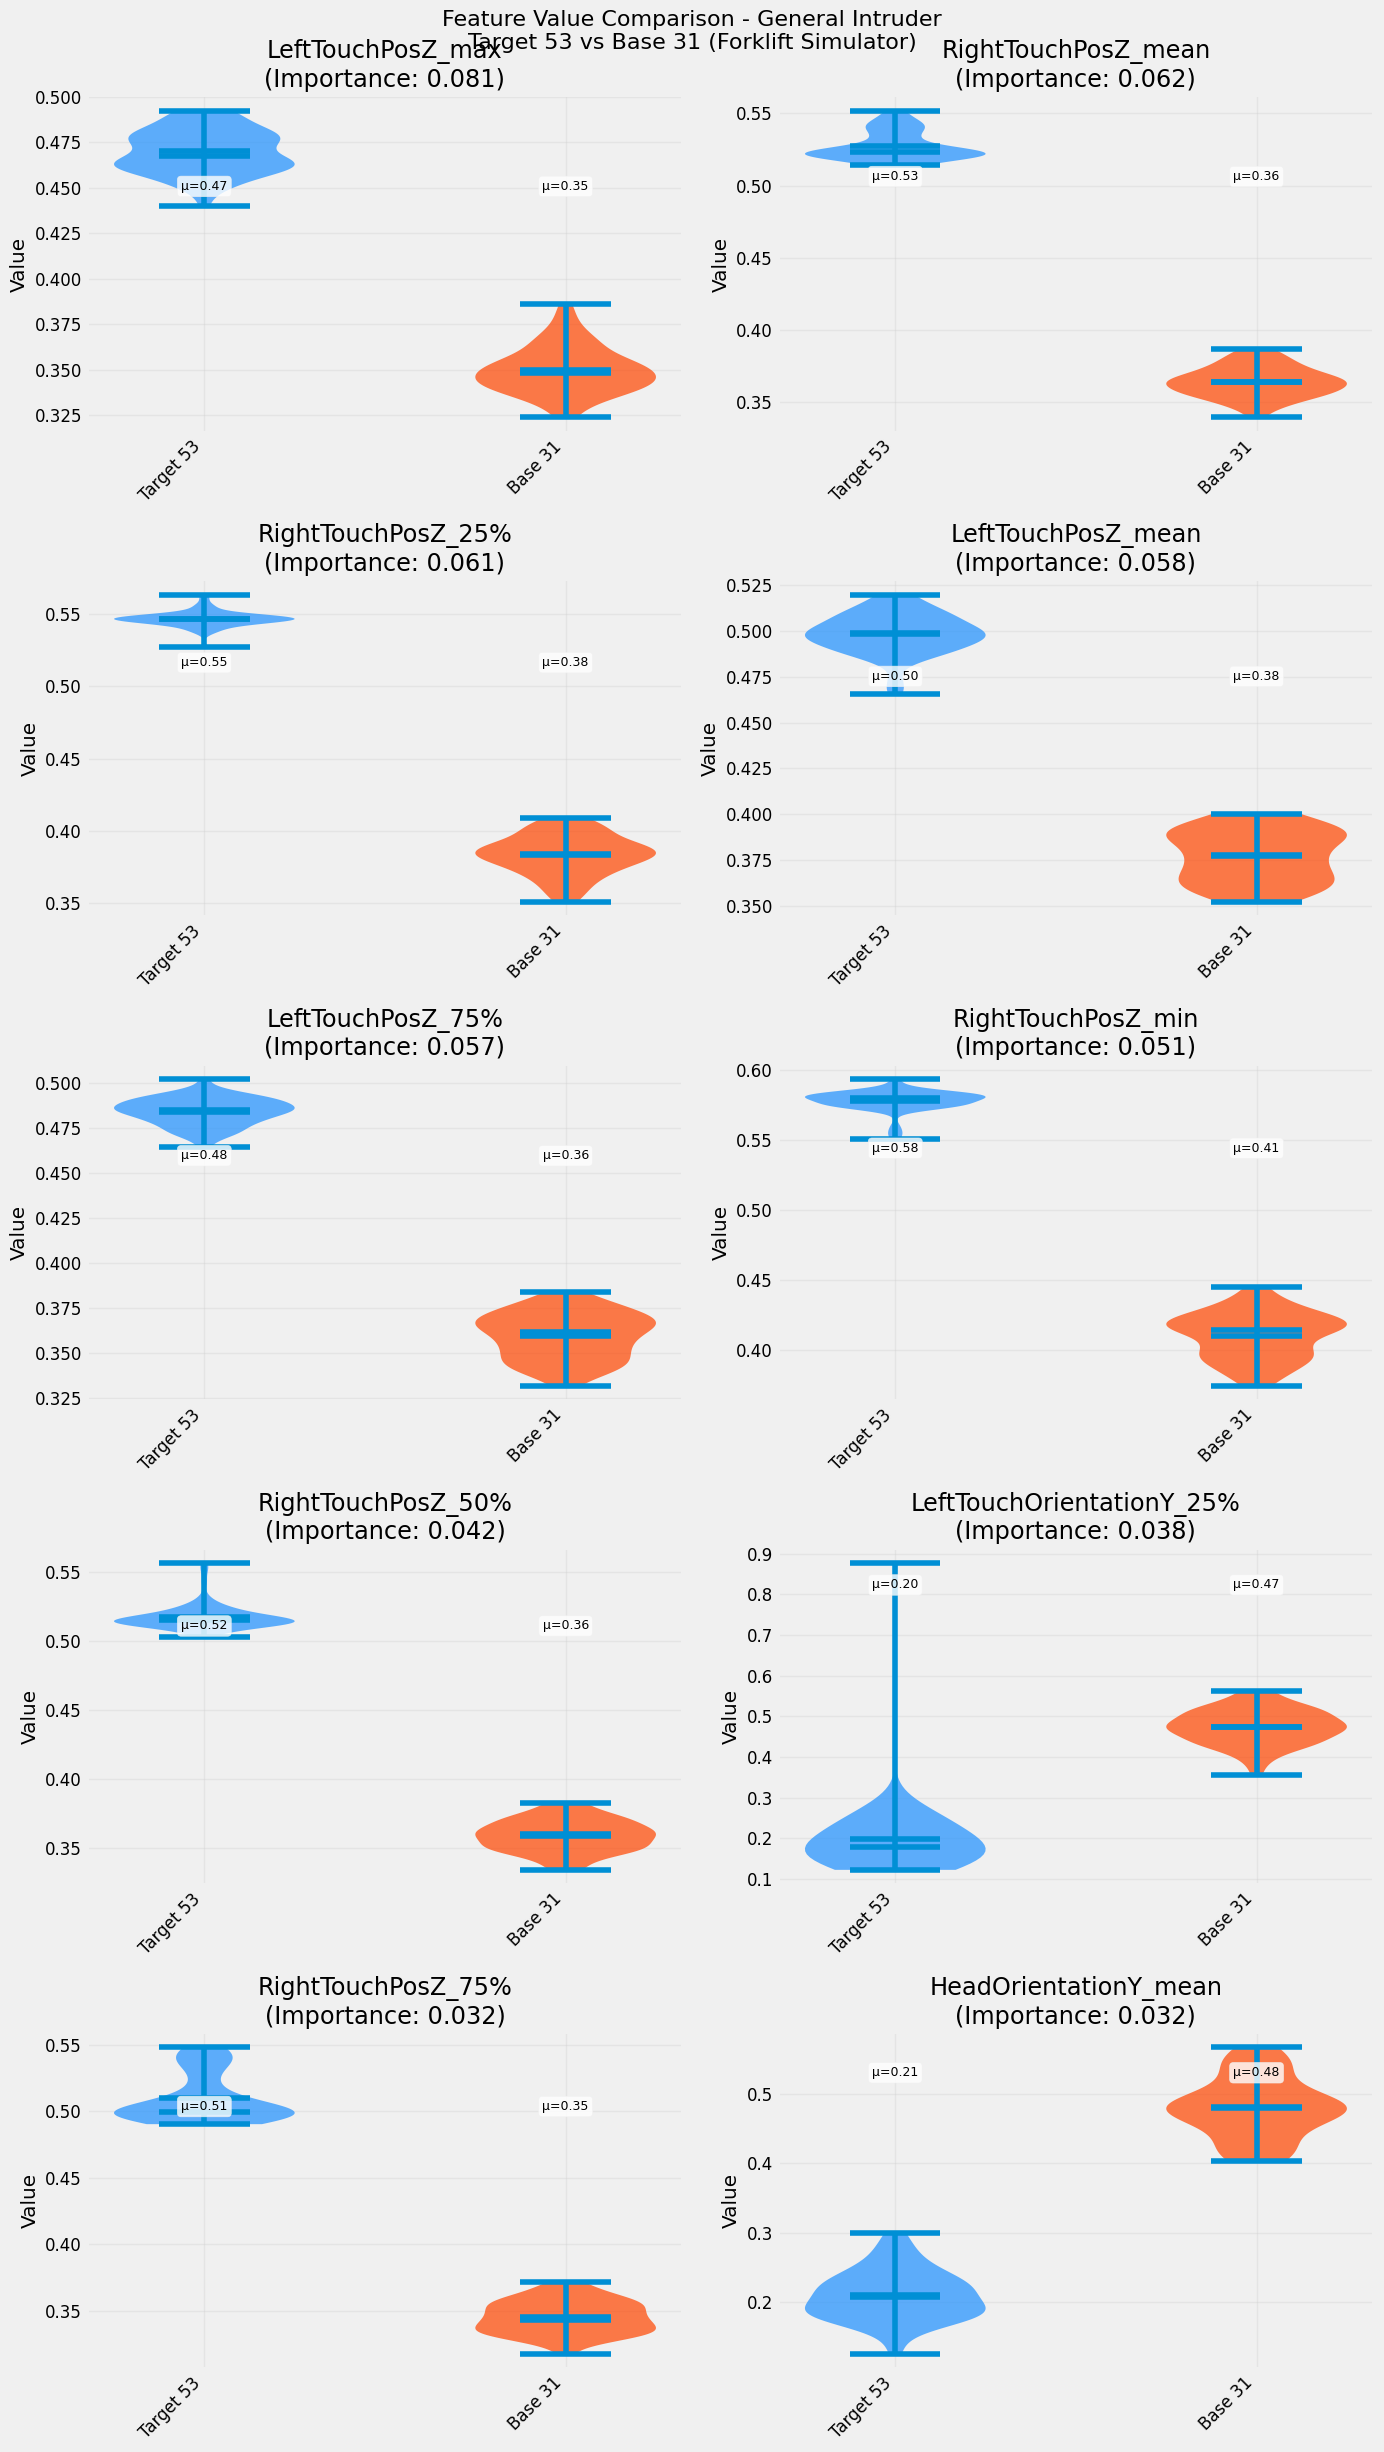

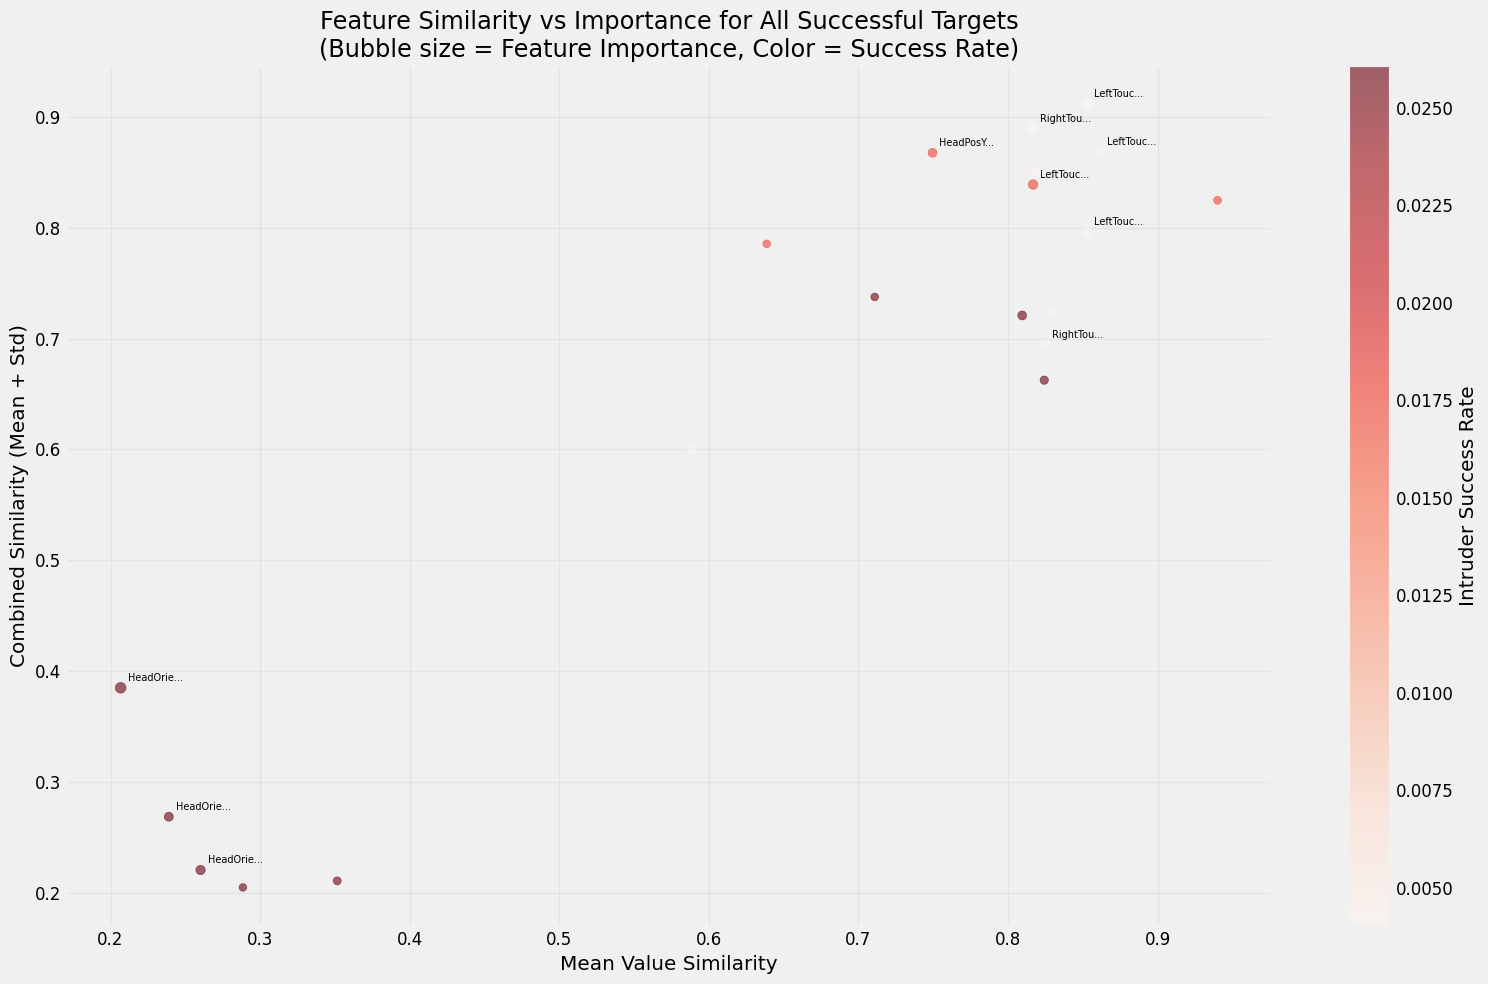

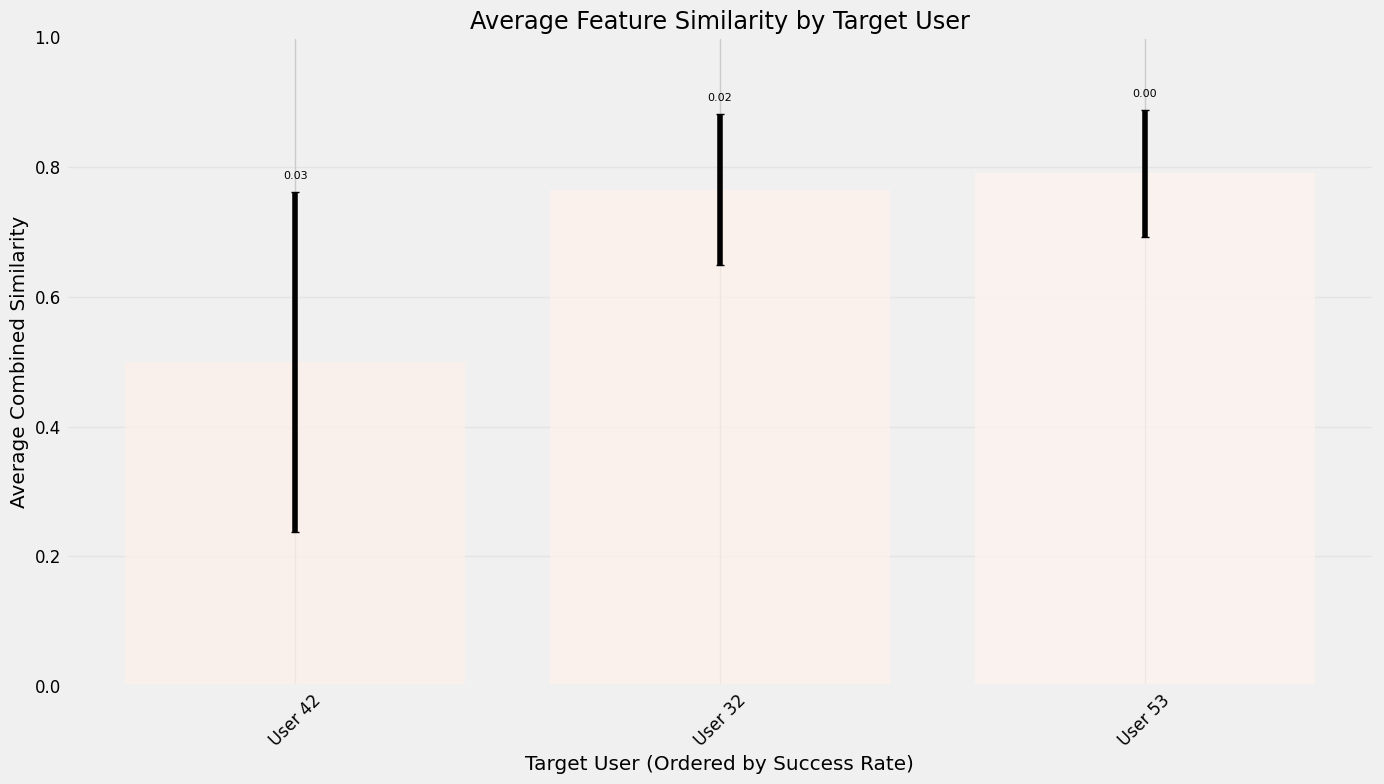

In [20]:
# Forklift Simulator evaluation with voting
print("\nEvaluating Forklift Simulator authentication with voting...")
forklift_standard, forklift_voting = evaluate_authentication_system_with_voting(
    authenticator=authenticator,
    intruder_data_path=intruder_data_path,
    game_type='forklift_simulator',
    target_users=forklift_sample_users,
    output_dir=os.path.join(output_dir, 'forklift_simulator'),
    voting_threshold=0.5,
    min_votes=3,
    max_votes=10,
    compare_with_standard=True,
    filename = FILENAME,
    model_name="RandomForest",
    without_height=False,
)


Evaluating Beat Saber authentication with voting...


combined intruders: 100%|██████████| 96/96 [00:37<00:00,  2.54it/s]


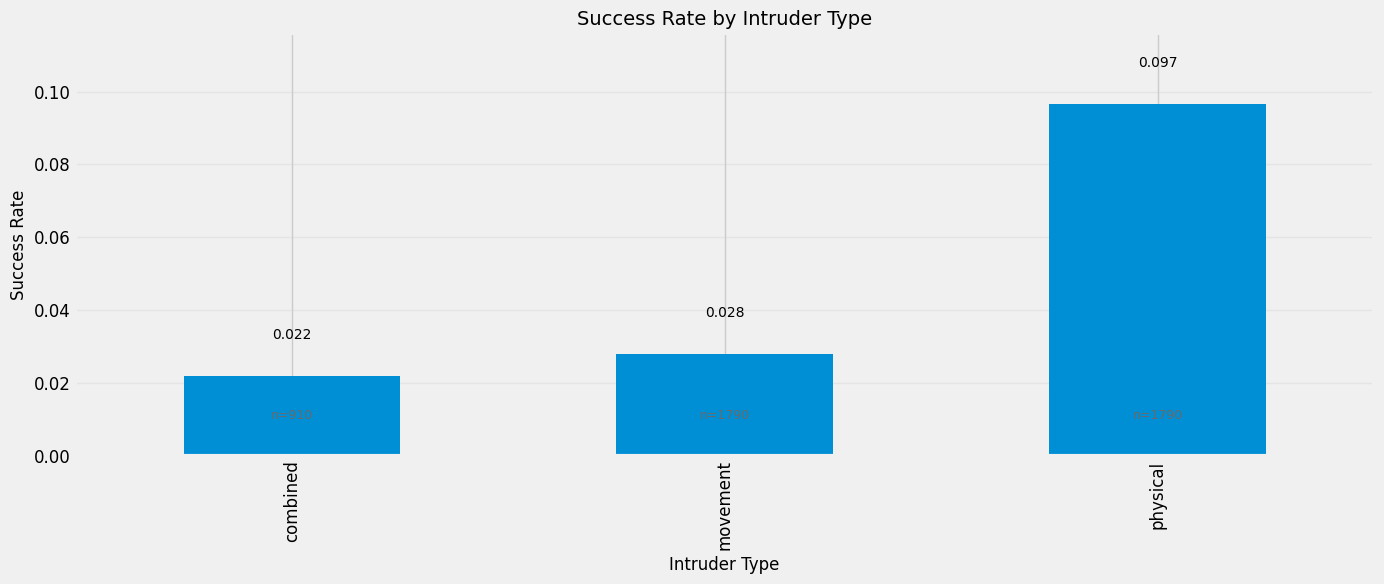

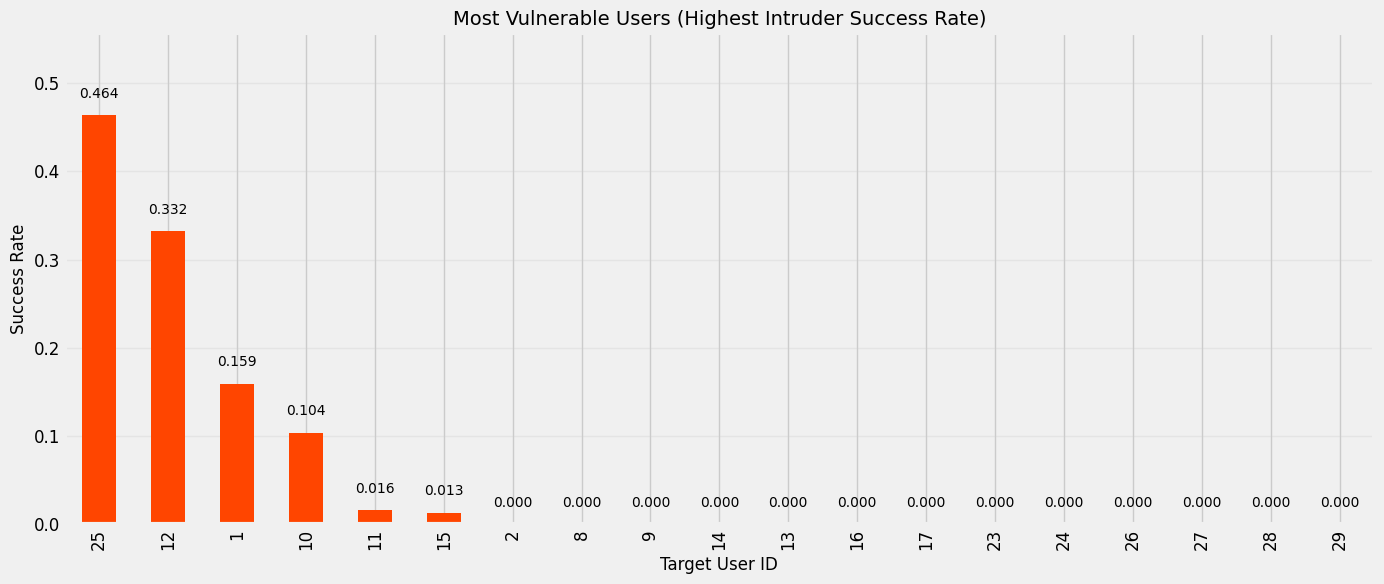

physical intruders: 100%|██████████| 189/189 [00:03<00:00, 54.19it/s]


In [ ]:
# Beat Saber evaluation with voting
print("\nEvaluating Beat Saber authentication with voting...")
beatsaber_standard, beatsaber_voting = evaluate_authentication_system_with_voting(
    authenticator=authenticator,
    intruder_data_path=intruder_data_path,
    game_type='beat_saber',
    target_users=beat_saber_sample_users,
    output_dir=os.path.join(output_dir, 'beat_saber'),
    voting_threshold=0.5,
    min_votes=3,
    max_votes=10,
    compare_with_standard=True,
    filename = FILENAME,
    model_name="RandomForest",
    without_height=False,
)

In [ ]:
plt.figure(figsize=(14, 8))

forklift_standard_bytype = forklift_standard.evaluation_results.groupby('Intruder_Type')['Authentication_Success'].mean()
beatsaber_standard_bytype = beatsaber_standard.evaluation_results.groupby('Intruder_Type')['Authentication_Success'].mean()

width = 0.4
x = np.arange(len(forklift_standard_bytype.index))
plt.bar(x - width/2, forklift_standard_bytype.values, width, label='Forklift (Standard)')
plt.bar(x + width/2, beatsaber_standard_bytype.values, width, label='Beat Saber (Standard)')

plt.xlabel('Intruder Type')
plt.ylabel('Intruder Success Rate')
plt.title('Intruder Success Rate by Type, Game, and Authentication Method')
plt.xticks(x, forklift_standard_bytype.index)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, f'comparison_standard_vs_voting_{FILENAME}.png'), dpi=300, bbox_inches='tight')
plt.show()

